In [1]:
import numpy as np
import pandas as pd

In [2]:
#简单处理数据-1   算总量

train = np.loadtxt('train_20171215.txt',dtype='int')

pro_train = []
i_pro_train = 0
pro_train.append(train[0])

for i in range(1,train.shape[0]):
    if train[i][0] == pro_train[i_pro_train][0]:
        pro_train[i_pro_train][3] += train[i][3]
    else:
        i_pro_train += 1
        pro_train.append(train[i])

pro_train = np.array(pro_train)

print(pro_train)

# 去掉类别那一行
pro_train = np.delete(pro_train,2,axis=1)

pro_train

[[   1    3    1   68]
 [   2    4    1   36]
 [   3    5    1 5565]
 ..., 
 [1030    2    1 4003]
 [1031    3    1 2513]
 [1032    4    1 1306]]


array([[   1,    3,   68],
       [   2,    4,   36],
       [   3,    5, 5565],
       ..., 
       [1030,    2, 4003],
       [1031,    3, 2513],
       [1032,    4, 1306]])

In [43]:
# 加载测试数据
test = np.loadtxt('test_A_20171225.txt',dtype='int')

In [16]:
# 写文件
np.savetxt('data_date-weekday-sum.txt', pro_train, fmt='%d', delimiter = '\t')  

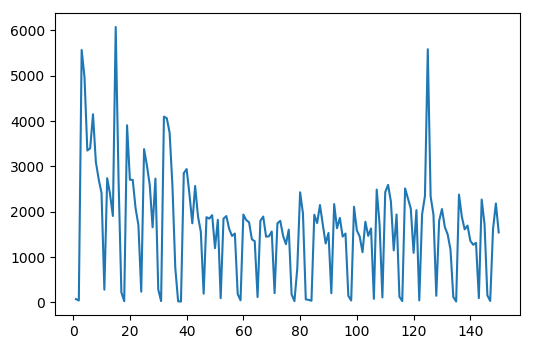

In [34]:
# 画图看看数据变动

import matplotlib.pyplot as plt
%matplotlib inline
x = pro_train[:,0]
y = pro_train[:,2]

x = x[0:150]
y = y[0:150]

plt.figure(dpi=100)
plt.plot(x,y)

In [46]:
# 我先看看有多少个星期
num_week_train = 1
for i in range( 0,pro_train.shape[0]-1 ):
    if pro_train[i+1][1] < pro_train[i][1]:
        num_week_train += 1
print('num_week_train: ',num_week_train)

num_week_train:  170


In [47]:
# 看看test数据中包含多少个星期
num_week_test = 1
for i in range( 0,test.shape[0]-1 ):
    if test[i+1][1] < test[i][1]:
        num_week_test += 1
print('num_week_train: ',num_week_test)

num_week_train:  45


In [ ]:
'''2018/01/09'''
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
%matplotlib inline

In [7]:
'''#处理数据-2   分星期算总量 并存好文件'''

import numpy as np
import pandas as pd

train = np.loadtxt('data_date-weekday-sum.txt',dtype='int')

print(train[0][0],train[0][1],train[0][2])   # 1 3 68
print(train[1][0],train[1][1],train[1][2])   # 2 4 36

train.shape  # (1032, 3)

1 3 68
2 4 36


(1032, 3)

In [16]:
def data_week(train)
    Mon = Tues = Wed = Thur = Fri = Sat = Sun = 0

    for i in range(train.shape[0]):
        if train[i][1] == 1:
            Mon = Mon + 1
        if train[i][1] == 2:
            Tues = Tues + 1
        if train[i][1] == 3:
            Wed = Wed + 1
        if train[i][1] == 4:
            Thur = Thur + 1
        if train[i][1] == 5:
            Fri = Fri + 1
        if train[i][1] == 6:
            Sat = Sat + 1
        if train[i][1] == 7:
            Sun = Sun + 1
    print(Mon,Tues,Wed,Thur,Fri,Sat,Sun)

In [22]:
print("train: ",data_week(train))
print("test: ",data_week(test))

160 163 165 166 164 160 54
train:  None
42 43 44 46 42 43 16
test:  None


In [61]:
def data_week_save(folder,train):
    Mon = []
    Tues = []
    Wed = []
    Thur = []
    Fri = []
    Sat = []
    Sun = []
    for i in range(train.shape[0]):
        if train[i][1] == 1:
            Mon.append(train[i][2])
        if train[i][1] == 2:
            Tues.append(train[i][2])
        if train[i][1] == 3:
            Wed.append(train[i][2])
        if train[i][1] == 4:
            Thur.append(train[i][2])
        if train[i][1] == 5:
            Fri.append(train[i][2])
        if train[i][1] == 6:
            Sat.append(train[i][2])
        if train[i][1] == 7:
            Sun.append(train[i][2])
    # 写文件
    np.savetxt(folder+'Sum-Mon.txt', Mon, fmt='%d', delimiter = '\t')
    np.savetxt(folder+'Sum-Tues.txt', Tues, fmt='%d', delimiter = '\t')
    np.savetxt(folder+'Sum-Wed.txt', Wed, fmt='%d', delimiter = '\t')
    np.savetxt(folder+'Sum-Thur.txt', Thur, fmt='%d', delimiter = '\t')
    np.savetxt(folder+'Sum-Fri.txt', Fri, fmt='%d', delimiter = '\t')
    np.savetxt(folder+'Sum-Sat.txt', Sat, fmt='%d', delimiter = '\t')
    np.savetxt(folder+'Sum-Sun.txt', Sun, fmt='%d', delimiter = '\t')

In [63]:
data_week_save('sum-week/train/',train)

In [87]:
'''#处理数据-3   根据星期算总量之后，先搞个平均数提交一下试试'''

data = np.loadtxt('test_A_20171225.txt',dtype='int')
test = data[:,1]
ID = data[:,0]

In [2]:
Mon = np.loadtxt('sum-week/train/Sum-Mon.txt',dtype='int')
Tues = np.loadtxt('sum-week/train/Sum-Tues.txt',dtype='int')
Wed = np.loadtxt('sum-week/train/Sum-Wed.txt',dtype='int')
Thur = np.loadtxt('sum-week/train/Sum-Thur.txt',dtype='int')
Fri = np.loadtxt('sum-week/train/Sum-Fri.txt',dtype='int')
Sat = np.loadtxt('sum-week/train/Sum-Sat.txt',dtype='int')
Sun = np.loadtxt('sum-week/train/Sum-Sun.txt',dtype='int')

In [89]:
for i in range(test.shape[0]):
    if(test[i] == 1):
        test[i] = round(np.average(Mon))
    if(test[i] == 2):
        test[i] = round(np.average(Tues))
    if(test[i] == 3):
        test[i] = round(np.average(Wed))
    if(test[i] == 4):
        test[i] = round(np.average(Thur))
    if(test[i] == 5):
        test[i] = round(np.average(Fri))
    if(test[i] == 6):
        test[i] = round(np.average(Sat))
    if(test[i] == 7):
        test[i] = round(np.average(Sun))

In [90]:
test

array([1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412, 2364, 2496,
       2095, 1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412, 2496,
       2095, 1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412, 2364,
       2496, 2095, 1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412,
       2364, 2496, 2095, 1626, 1889,  412, 2364, 2496, 2095, 1626,  412,
        743, 2364, 2496, 2095, 1626, 1889,  412,  743, 2364, 2496, 2095,
       1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412, 2364, 2496,
       2095, 1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412, 2364,
       2496, 2095, 1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412,
       2364, 2496, 2095, 1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,
        412, 2364, 2496, 2095, 1626, 1889,  412,  743, 2364, 2496, 2095,
       1626, 1889,  412, 2364, 2496, 2095, 1626, 1889,  412,  743, 2364,
       2496, 2095, 1626, 1889,  412, 2364, 2496, 2095, 1626,  412,  743,
       2364, 2496, 2095, 1626, 1889,  412, 2364, 24

In [91]:
ans = np.vstack( (ID,test) )

In [96]:
ans = ans.T
ans

array([[1032, 1626],
       [1033, 1889],
       [1034,  412],
       [1035, 2364],
       [1036, 2496],
       [1037, 2095],
       [1038, 1626],
       [1039, 1889],
       [1040,  412],
       [1041, 2364],
       [1042, 2496],
       [1043, 2095],
       [1044, 1626],
       [1045, 1889],
       [1046,  412],
       [1047, 2364],
       [1048, 2496],
       [1049, 2095],
       [1050, 1626],
       [1051, 1889],
       [1052,  412],
       [1053, 2496],
       [1054, 2095],
       [1055, 1626],
       [1056, 1889],
       [1057,  412],
       [1058, 2364],
       [1059, 2496],
       [1060, 2095],
       [1061, 1626],
       [1062, 1889],
       [1063,  412],
       [1064, 2364],
       [1065, 2496],
       [1066, 2095],
       [1067, 1626],
       [1068, 1889],
       [1069,  412],
       [1070, 2364],
       [1071, 2496],
       [1072, 2095],
       [1073, 1626],
       [1074, 1889],
       [1075,  412],
       [1076, 2364],
       [1077, 2496],
       [1078, 2095],
       [1079,

In [98]:
# 写入文件
np.savetxt('submit/'+'week-average.txt',ans, fmt='%d', delimiter = '\t')

In [104]:
'''#处理数据-4   根据星期算总量之后，画图看看效果'''
import matplotlib.pyplot as plt
def plot_results(data):
    plt.plot(data)
    plt.legend()
    plt.show()

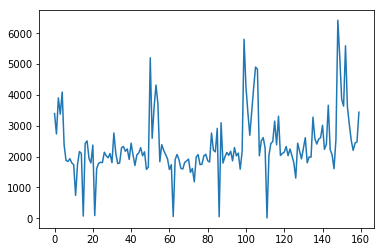

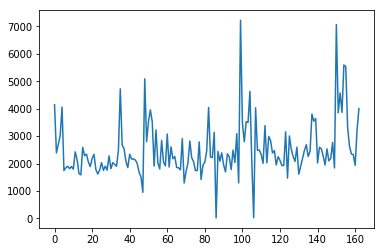

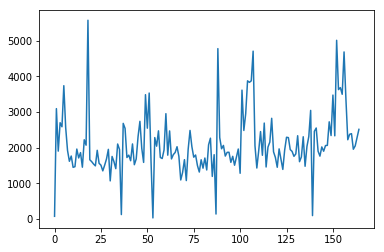

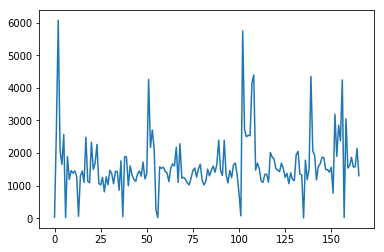

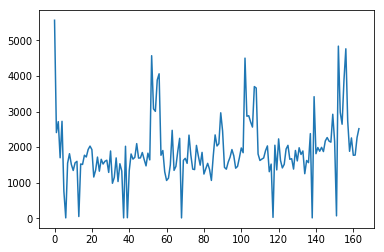

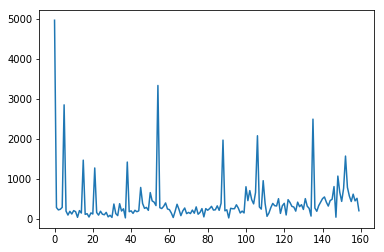

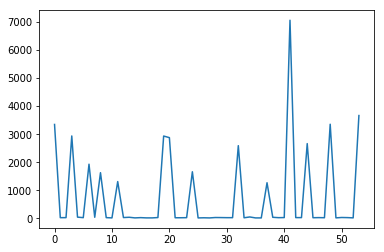

In [107]:
plot_results(Mon)
plot_results(Tues)
plot_results(Wed)
plot_results(Thur)
plot_results(Fri)
plot_results(Sat)
plot_results(Sun)

In [1]:
'''#处理数据-5   七个周天，七种预测值'''
import numpy as np
import pandas as pd

Mon = np.loadtxt('sum-week/train/Sum-Mon.txt',dtype='int')
Tues = np.loadtxt('sum-week/train/Sum-Tues.txt',dtype='int')
Wed = np.loadtxt('sum-week/train/Sum-Wed.txt',dtype='int')
Thur = np.loadtxt('sum-week/train/Sum-Thur.txt',dtype='int')
Fri = np.loadtxt('sum-week/train/Sum-Fri.txt',dtype='int')
Sat = np.loadtxt('sum-week/train/Sum-Sat.txt',dtype='int')
Sun = np.loadtxt('sum-week/train/Sum-Sun.txt',dtype='int')

In [7]:
'''切数据'''
def slicing_data(data,seq_len):    
    
    print('result len(data):',len(data))
    print('result data.shape:',np.array(data).shape)
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])  #得到长度为seq_len+1的向量，最后一个作为label
    
    print('result len(slicing):',len(result))
    print('result slicing_shape:',np.array(result).shape)
    print(result[:1])
    
    result = np.array(result)
    
    #划分train、test
    row = len(result)-1  #四舍五入
    train = result[:row, :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[row:, :-1]
    y_test = result[row:, -1]
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#    print('result x_train.shape',x_train.shape)
#    print('result y_train.shape',y_train.shape)
#    print('result x_test.shape',x_test.shape)
#    print('result y_test.shape',y_test.shape)
 
    return [x_train, y_train, x_test, y_test]

In [8]:
'''跑模型 LSTM'''
# -*- coding: utf-8 -*-

from __future__ import print_function

import warnings
import numpy as np
import time
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [9]:
def build_model(layers): #layers ： [1,50,100,1]
    model = Sequential()

    model.add(LSTM(input_dim=layers[0],output_dim=layers[1],return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(layers[2],return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(output_dim=layers[3]))
    model.add(Activation("linear"))

    model.compile(loss="mse", optimizer="rmsprop")
    return model

#直接全部预测
def predict_point_by_point(model, data):
    predicted = model.predict(data)
    print('predicted shape:',np.array(predicted).shape)  #(412L,1L)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

'''训练模型'''
model = build_model([1, 50, 100, 1])


In [8]:
'''跑数据和模型'''
epochs  = 500
seq_len = 24

X_train, y_train, X_test, y_test = slicing_data( Tues , seq_len )
print('X_train shape:',X_train.shape)  #(3709L, 50L, 1L)
print('y_train shape:',y_train.shape)  #(3709L,)
print('X_test shape:',X_test.shape)    #(412L, 50L, 1L)
print('y_test shape:',y_test.shape)    #(412L,)

model.fit(X_train,y_train,batch_size=4,nb_epoch=epochs,validation_split=0.05)
'''做预测'''
point_by_point_predictions = predict_point_by_point(model, X_test)
print('point_by_point_predictions shape:',np.array(point_by_point_predictions).shape)  #(412L)

print('result: ',point_by_point_predictions)

('result len(data):', 163)
('result data.shape:', (163,))
('result len(slicing):', 138)
('result slicing_shape:', (138, 25))
[array([4146, 2386, 2700, 3016, 4059, 1740, 1844, 1900, 1812, 1889, 1794,
       2424, 2143, 1631, 1584, 2587, 2284, 2342, 2055, 1885, 2178, 2336,
       1781, 1615, 1759])]
X_train shape: (137, 24, 1)
y_train shape: (137,)
X_test shape: (1, 24, 1)
y_test shape: (1,)
Train on 130 samples, validate on 7 samples
Epoch 1/500
130/130 [==============================] - 0s - loss: 6215301.7308 - val_loss: 13235573.7857
Epoch 2/500
130/130 [==============================] - 0s - loss: 6194921.4846 - val_loss: 13214567.7143
Epoch 3/500
130/130 [==============================] - 0s - loss: 6175216.8731 - val_loss: 13194650.8571
Epoch 4/500
130/130 [==============================] - 0s - loss: 6166863.6308 - val_loss: 13174093.9286
Epoch 5/500
130/130 [==============================] - 0s - loss: 6154323.7923 - val_loss: 13154057.1429
Epoch 6/500
130/130 [=================

130/130 [==============================] - 0s - loss: 4322546.1615 - val_loss: 10430280.3571
Epoch 151/500
130/130 [==============================] - 0s - loss: 4305045.6885 - val_loss: 10413306.5714
Epoch 152/500
130/130 [==============================] - 0s - loss: 4303607.5000 - val_loss: 10395820.6429
Epoch 153/500
130/130 [==============================] - 0s - loss: 4303404.5577 - val_loss: 10378512.3571
Epoch 154/500
130/130 [==============================] - 0s - loss: 4281415.6769 - val_loss: 10361695.3571
Epoch 155/500
130/130 [==============================] - 0s - loss: 4298968.2115 - val_loss: 10344580.9286
Epoch 156/500
130/130 [==============================] - 0s - loss: 4276192.1962 - val_loss: 10327264.0714
Epoch 157/500
130/130 [==============================] - 0s - loss: 4266378.6385 - val_loss: 10309900.5000
Epoch 158/500
130/130 [==============================] - 0s - loss: 4228058.6500 - val_loss: 10292730.3571
Epoch 159/500
130/130 [============================

130/130 [==============================] - 0s - loss: 2865558.7808 - val_loss: 8020215.2500
Epoch 305/500
130/130 [==============================] - 0s - loss: 2848763.9279 - val_loss: 8006590.2857
Epoch 306/500
130/130 [==============================] - 0s - loss: 2846962.5731 - val_loss: 7991836.1071
Epoch 307/500
130/130 [==============================] - 0s - loss: 2821465.1462 - val_loss: 7978595.6429
Epoch 308/500
130/130 [==============================] - 0s - loss: 2831656.0731 - val_loss: 7964654.0357
Epoch 309/500
130/130 [==============================] - 0s - loss: 2814056.5500 - val_loss: 7950016.6429
Epoch 310/500
130/130 [==============================] - 0s - loss: 2802518.3317 - val_loss: 7937238.1429
Epoch 311/500
130/130 [==============================] - 0s - loss: 2809554.6250 - val_loss: 7923352.1429
Epoch 312/500
130/130 [==============================] - 0s - loss: 2780542.7096 - val_loss: 7909065.2143
Epoch 313/500
130/130 [==============================] - 0s 

130/130 [==============================] - 0s - loss: 1807790.4495 - val_loss: 6115354.0179
Epoch 459/500
130/130 [==============================] - 0s - loss: 1840437.3981 - val_loss: 6104059.5714
Epoch 460/500
130/130 [==============================] - 0s - loss: 1823470.7700 - val_loss: 6093833.1429
Epoch 461/500
130/130 [==============================] - 0s - loss: 1805946.3594 - val_loss: 6083615.428614194.007
Epoch 462/500
130/130 [==============================] - 0s - loss: 1826358.4510 - val_loss: 6073248.4107
Epoch 463/500
130/130 [==============================] - 0s - loss: 1805230.0832 - val_loss: 6062787.8571
Epoch 464/500
130/130 [==============================] - 0s - loss: 1817363.4639 - val_loss: 6052349.9464
Epoch 465/500
130/130 [==============================] - 0s - loss: 1818133.8341 - val_loss: 6042219.5893
Epoch 466/500
130/130 [==============================] - 0s - loss: 1814180.2990 - val_loss: 6031330.7321
Epoch 467/500
130/130 [============================

In [9]:
print(Tues)
point_by_point_predictions

[4146 2386 2700 3016 4059 1740 1844 1900 1812 1889 1794 2424 2143 1631 1584
 2587 2284 2342 2055 1885 2178 2336 1781 1615 1759 2033 1751 1905 1760 2281
 1811 2032 1965 1900 2483 4723 2669 2541 2077 1849 2338 2160 2170 2126 2002
 1680 1514  950 5090 2796 3528 3957 3525 1904 3224 2018 1802 2848 2051 1915
 3076 1870 2607 2174 2257 1857 1841 1769 2908 1288 1713 2016 2822 2209 2072
 1739 1749 2787 1416 1941 2049 2466 4044 2231 2219 3137   15 2441 2085 2389
 1946 1692 2356 2242 1778 2490 2036 3091 1292 7226 3472 2794 3526 3498 4630
 2040   23 4032 2479 2491 2325 2007 3380 2024 2985 2830 2383 2472 1948 2246
 2114 1925 1926 3157 1465 3005 2520 2255 2076 2596 1608 1902 2200 2477 2684
 2256 2445 3804 3546 3639 2019 2594 2538 2268 1947 2535 2098 2181 2771 1839
 7069 3848 4572 3865 5592 5537 3315 2627 2344 2326 1934 3208 4003]


array([ 1644.06811523], dtype=float32)

In [10]:
'''跑数据和模型 写成函数的形式'''
def run_model(data):
    epochs  = 1000
    seq_len = 24
    
    X_train, y_train, X_test, y_test = slicing_data( data , seq_len )
    print('X_train shape:',X_train.shape)  #(3709L, 50L, 1L)
    print('y_train shape:',y_train.shape)  #(3709L,)
    print('X_test shape:',X_test.shape)    #(412L, 50L, 1L)
    print('y_test shape:',y_test.shape)    #(412L,)
    
    model.fit( X_train,y_train, batch_size=4, nb_epoch=epochs, validation_split=0.05 )
    '''做预测'''
    point_by_point_predictions = predict_point_by_point(model, X_test)
    print('point_by_point_predictions shape:',np.array(point_by_point_predictions).shape)  #(412L)
    
    print('result: ',point_by_point_predictions)
    
    return point_by_point_predictions

In [11]:
'''跑七个模型'''
data = [Mon, Tues, Wed, Thur, Fri, Sat, Sun]
result = []
for index in data:
    result.append( run_model(index) )

result len(data): 160
result data.shape: (160,)
result len(slicing): 135
result slicing_shape: (135, 25)
[array([3396, 2735, 3903, 3377, 4094, 2377, 1874, 1843, 1933, 1797, 1739,
        744, 1745, 2164, 2104,   73, 2427, 2509, 1940, 1794, 2374,   89,
       1612, 1778, 1819])]
X_train shape: (134, 24, 1)
y_train shape: (134,)
X_test shape: (1, 24, 1)
y_test shape: (1,)
Train on 127 samples, validate on 7 samples
Epoch 1/1000
127/127 [==============================] - 2s - loss: 6742899.3898 - val_loss: 5835897.5000
Epoch 2/1000
127/127 [==============================] - 0s - loss: 6712296.5118 - val_loss: 5820862.2143
Epoch 3/1000
127/127 [==============================] - 0s - loss: 6698608.0551 - val_loss: 5807324.2857
Epoch 4/1000
127/127 [==============================] - 0s - loss: 6683669.6909 - val_loss: 5793090.5714
Epoch 5/1000
127/127 [==============================] - 0s - loss: 6668462.5591 - val_loss: 5778743.0000
Epoch 6/1000
127/127 [==============================] - 0s

127/127 [==============================] - 0s - loss: 5704005.0945 - val_loss: 4849836.1429
Epoch 75/1000
127/127 [==============================] - 0s - loss: 5708282.0846 - val_loss: 4837109.5714
Epoch 76/1000
127/127 [==============================] - 0s - loss: 5696404.2795 - val_loss: 4824262.9643
Epoch 77/1000
127/127 [==============================] - 0s - loss: 5672112.0906 - val_loss: 4811805.8571
Epoch 78/1000
127/127 [==============================] - 0s - loss: 5666464.0748 - val_loss: 4798970.8929
Epoch 79/1000
127/127 [==============================] - 0s - loss: 5657150.7795 - val_loss: 4786332.6071
Epoch 80/1000
127/127 [==============================] - 0s - loss: 5636017.0591 - val_loss: 4773700.7143
Epoch 81/1000
127/127 [==============================] - 0s - loss: 5623349.7323 - val_loss: 4761362.6786
Epoch 82/1000
127/127 [==============================] - 0s - loss: 5613516.2520 - val_loss: 4748263.4286
Epoch 83/1000
127/127 [==============================] - 0s 

127/127 [==============================] - 0s - loss: 4770708.5886 - val_loss: 3932457.4643
Epoch 151/1000
127/127 [==============================] - 0s - loss: 4766570.8169 - val_loss: 3921562.6786
Epoch 152/1000
127/127 [==============================] - 0s - loss: 4755527.6417 - val_loss: 3910173.2500
Epoch 153/1000
127/127 [==============================] - 0s - loss: 4734190.1811 - val_loss: 3898857.0357
Epoch 154/1000
127/127 [==============================] - 0s - loss: 4727711.2146 - val_loss: 3887527.3571
Epoch 155/1000
127/127 [==============================] - 0s - loss: 4709293.2047 - val_loss: 3876489.8571
Epoch 156/1000
127/127 [==============================] - 0s - loss: 4680267.3642 - val_loss: 3865139.3571
Epoch 157/1000
127/127 [==============================] - 0s - loss: 4688147.6909 - val_loss: 3854051.7500
Epoch 158/1000
127/127 [==============================] - 0s - loss: 4672969.5512 - val_loss: 3842666.0714
Epoch 159/1000
127/127 [============================

127/127 [==============================] - 0s - loss: 3939732.1683 - val_loss: 3127011.9286
Epoch 227/1000
127/127 [==============================] - 0s - loss: 3926863.4843 - val_loss: 3116971.3036
Epoch 228/1000
127/127 [==============================] - 0s - loss: 3915475.0453 - val_loss: 3107297.3750
Epoch 229/1000
127/127 [==============================] - 0s - loss: 3894019.2992 - val_loss: 3097436.7679
Epoch 230/1000
127/127 [==============================] - 0s - loss: 3909923.2067 - val_loss: 3087779.4286
Epoch 231/1000
127/127 [==============================] - 0s - loss: 3891717.7657 - val_loss: 3077851.0000
Epoch 232/1000
127/127 [==============================] - 0s - loss: 3889787.5866 - val_loss: 3068183.5714
Epoch 233/1000
127/127 [==============================] - 0s - loss: 3860768.3120 - val_loss: 3058862.8750
Epoch 234/1000
127/127 [==============================] - 0s - loss: 3855694.1604 - val_loss: 3049013.7143
Epoch 235/1000
127/127 [============================

127/127 [==============================] - 0s - loss: 3230347.7510 - val_loss: 2433294.5536
Epoch 303/1000
127/127 [==============================] - 0s - loss: 3228569.6535 - val_loss: 2424755.7321
Epoch 304/1000
127/127 [==============================] - 0s - loss: 3185493.9587 - val_loss: 2416528.6607
Epoch 305/1000
127/127 [==============================] - 0s - loss: 3224984.5098 - val_loss: 2408176.1964
Epoch 306/1000
127/127 [==============================] - 0s - loss: 3175562.7008 - val_loss: 2400185.2143
Epoch 307/1000
127/127 [==============================] - 0s - loss: 3175522.3110 - val_loss: 2391588.9107
Epoch 308/1000
127/127 [==============================] - 0s - loss: 3158273.1634 - val_loss: 2383520.5000
Epoch 309/1000
127/127 [==============================] - 0s - loss: 3183336.0005 - val_loss: 2375397.2857
Epoch 310/1000
127/127 [==============================] - 0s - loss: 3171040.0148 - val_loss: 2367112.3393
Epoch 311/1000
127/127 [============================

127/127 [==============================] - 0s - loss: 2662613.1909 - val_loss: 1851956.8393
Epoch 379/1000
127/127 [==============================] - 0s - loss: 2614969.7702 - val_loss: 1845153.9643
Epoch 380/1000
127/127 [==============================] - 0s - loss: 2602489.7515 - val_loss: 1838189.6339
Epoch 381/1000
127/127 [==============================] - 0s - loss: 2573702.5935 - val_loss: 1831309.3214
Epoch 382/1000
127/127 [==============================] - 0s - loss: 2576484.8317 - val_loss: 1824412.7857
Epoch 383/1000
127/127 [==============================] - 0s - loss: 2581955.5940 - val_loss: 1817703.6696
Epoch 384/1000
127/127 [==============================] - 0s - loss: 2573081.5458 - val_loss: 1811022.3571
Epoch 385/1000
127/127 [==============================] - 0s - loss: 2558946.9961 - val_loss: 1804207.0446
Epoch 386/1000
127/127 [==============================] - 0s - loss: 2558488.7539 - val_loss: 1797153.6786
Epoch 387/1000
127/127 [============================

127/127 [==============================] - 0s - loss: 2152910.2215 - val_loss: 1378166.9286
Epoch 455/1000
127/127 [==============================] - 0s - loss: 2103669.0620 - val_loss: 1372448.7500
Epoch 456/1000
127/127 [==============================] - 0s - loss: 2090774.9493 - val_loss: 1367290.7232
Epoch 457/1000
127/127 [==============================] - 0s - loss: 2090168.3903 - val_loss: 1361806.7411
Epoch 458/1000
127/127 [==============================] - 0s - loss: 2101672.2719 - val_loss: 1356228.4554
Epoch 459/1000
127/127 [==============================] - 0s - loss: 2087880.0728 - val_loss: 1350749.8661
Epoch 460/1000
127/127 [==============================] - 0s - loss: 2062915.7357 - val_loss: 1345499.1161
Epoch 461/1000
127/127 [==============================] - 0s - loss: 2105323.1496 - val_loss: 1340002.7143
Epoch 462/1000
127/127 [==============================] - 0s - loss: 2098840.8356 - val_loss: 1334907.4732
Epoch 463/1000
127/127 [============================

127/127 [==============================] - 0s - loss: 1758591.6703 - val_loss: 1013009.0938
Epoch 531/1000
127/127 [==============================] - 0s - loss: 1729094.5837 - val_loss: 1008920.3616
Epoch 532/1000
127/127 [==============================] - 0s - loss: 1737667.3394 - val_loss: 1005072.1562
Epoch 533/1000
127/127 [==============================] - 0s - loss: 1693291.3848 - val_loss: 1000777.5134
Epoch 534/1000
127/127 [==============================] - 0s - loss: 1747029.6702 - val_loss: 997115.1295
Epoch 535/1000
127/127 [==============================] - 0s - loss: 1705068.0914 - val_loss: 992956.9330
Epoch 536/1000
127/127 [==============================] - 0s - loss: 1728883.8369 - val_loss: 988843.4866
Epoch 537/1000
127/127 [==============================] - 0s - loss: 1692588.2894 - val_loss: 984839.2455
Epoch 538/1000
127/127 [==============================] - 0s - loss: 1690705.0655 - val_loss: 980691.2455
Epoch 539/1000
127/127 [==============================] -

127/127 [==============================] - 0s - loss: 1443136.0368 - val_loss: 746738.4777
Epoch 608/1000
127/127 [==============================] - 0s - loss: 1446437.3597 - val_loss: 743929.5000
Epoch 609/1000
127/127 [==============================] - 0s - loss: 1440634.2551 - val_loss: 741163.0045
Epoch 610/1000
127/127 [==============================] - 0s - loss: 1430464.8425 - val_loss: 738428.6161
Epoch 611/1000
127/127 [==============================] - 0s - loss: 1479241.8541 - val_loss: 735464.1071
Epoch 612/1000
127/127 [==============================] - 0s - loss: 1453101.7518 - val_loss: 732764.5915476102.186
Epoch 613/1000
127/127 [==============================] - 0s - loss: 1417394.7963 - val_loss: 730219.0826
Epoch 614/1000
127/127 [==============================] - 0s - loss: 1403205.5592 - val_loss: 727471.1362
Epoch 615/1000
127/127 [==============================] - 0s - loss: 1410405.4656 - val_loss: 724771.3125
Epoch 616/1000
127/127 [===========================

127/127 [==============================] - 0s - loss: 1248295.9054 - val_loss: 573331.4799
Epoch 685/1000
127/127 [==============================] - 0s - loss: 1246906.5922 - val_loss: 571472.2835
Epoch 686/1000
127/127 [==============================] - 0s - loss: 1267393.8342 - val_loss: 569895.5000
Epoch 687/1000
127/127 [==============================] - 0s - loss: 1243271.6359 - val_loss: 568106.4754
Epoch 688/1000
127/127 [==============================] - 0s - loss: 1251177.7917 - val_loss: 566446.0290
Epoch 689/1000
127/127 [==============================] - 0s - loss: 1233237.2506 - val_loss: 564712.8549
Epoch 690/1000
127/127 [==============================] - 0s - loss: 1219097.9828 - val_loss: 562920.9933
Epoch 691/1000
127/127 [==============================] - 0s - loss: 1248324.0513 - val_loss: 561317.1629
Epoch 692/1000
127/127 [==============================] - 0s - loss: 1274036.8137 - val_loss: 559452.0513
Epoch 693/1000
127/127 [==============================] - 0s 

127/127 [==============================] - 0s - loss: 1127445.5368 - val_loss: 471673.1518
Epoch 762/1000
127/127 [==============================] - 0s - loss: 1153409.4700 - val_loss: 470690.5022
Epoch 763/1000
127/127 [==============================] - 0s - loss: 1121855.3516 - val_loss: 469660.7969
Epoch 764/1000
127/127 [==============================] - 0s - loss: 1133588.7317 - val_loss: 468796.6183
Epoch 765/1000
127/127 [==============================] - 0s - loss: 1140170.7468 - val_loss: 468087.3929
Epoch 766/1000
127/127 [==============================] - 0s - loss: 1134016.3245 - val_loss: 467150.9152
Epoch 767/1000
127/127 [==============================] - 0s - loss: 1093930.6220 - val_loss: 466326.3817
Epoch 768/1000
127/127 [==============================] - 0s - loss: 1145595.4237 - val_loss: 465548.2411
Epoch 769/1000
127/127 [==============================] - 0s - loss: 1151787.7680 - val_loss: 464616.5045
Epoch 770/1000
127/127 [==============================] - 0s 

127/127 [==============================] - 0s - loss: 1069333.6905 - val_loss: 421093.2299
Epoch 839/1000
127/127 [==============================] - 0s - loss: 1116688.3273 - val_loss: 420721.1987
Epoch 840/1000
127/127 [==============================] - 0s - loss: 1078640.7888 - val_loss: 420335.5603
Epoch 841/1000
127/127 [==============================] - 0s - loss: 1071645.8923 - val_loss: 419924.3281
Epoch 842/1000
127/127 [==============================] - 0s - loss: 1054360.6918 - val_loss: 419481.2165
Epoch 843/1000
127/127 [==============================] - 0s - loss: 1059445.5594 - val_loss: 419092.5335
Epoch 844/1000
127/127 [==============================] - 0s - loss: 1077904.7348 - val_loss: 418736.8906
Epoch 845/1000
127/127 [==============================] - 0s - loss: 1058428.2769 - val_loss: 418387.4844
Epoch 846/1000
127/127 [==============================] - 0s - loss: 1062671.4099 - val_loss: 417953.6272
Epoch 847/1000
127/127 [==============================] - 0s 

127/127 [==============================] - 0s - loss: 1042853.9906 - val_loss: 398907.5871
Epoch 916/1000
127/127 [==============================] - 0s - loss: 1051844.2851 - val_loss: 398698.4442
Epoch 917/1000
127/127 [==============================] - 0s - loss: 1056541.6377 - val_loss: 398555.3192
Epoch 918/1000
127/127 [==============================] - 0s - loss: 1050940.4279 - val_loss: 398370.6741
Epoch 919/1000
127/127 [==============================] - 0s - loss: 1088685.4580 - val_loss: 398171.6987
Epoch 920/1000
127/127 [==============================] - 0s - loss: 1072274.9569 - val_loss: 397998.0915
Epoch 921/1000
127/127 [==============================] - 0s - loss: 1034315.6713 - val_loss: 397834.2589
Epoch 922/1000
127/127 [==============================] - 0s - loss: 1060639.9180 - val_loss: 397651.1094
Epoch 923/1000
127/127 [==============================] - 0s - loss: 1049741.7896 - val_loss: 397460.8772
Epoch 924/1000
127/127 [==============================] - 0s 

127/127 [==============================] - 0s - loss: 996228.9625 - val_loss: 390135.4442
Epoch 993/1000
127/127 [==============================] - 0s - loss: 1056136.8525 - val_loss: 390080.3125
Epoch 994/1000
127/127 [==============================] - 0s - loss: 1023554.3743 - val_loss: 390024.3415
Epoch 995/1000
127/127 [==============================] - 0s - loss: 1032216.4574 - val_loss: 389980.1071
Epoch 996/1000
127/127 [==============================] - 0s - loss: 1053533.4555 - val_loss: 389921.0603
Epoch 997/1000
127/127 [==============================] - 0s - loss: 1057826.2718 - val_loss: 389847.1607
Epoch 998/1000
127/127 [==============================] - 0s - loss: 1047326.8834 - val_loss: 389779.1964
Epoch 999/1000
127/127 [==============================] - 0s - loss: 1020006.1828 - val_loss: 389710.8906
Epoch 1000/1000
127/127 [==============================] - 0s - loss: 1036709.2964 - val_loss: 389659.2768
predicted shape: (1, 1)
point_by_point_predictions shape: (1,

130/130 [==============================] - 0s - loss: 1191205.9837 - val_loss: 283056.4598
Epoch 66/1000
130/130 [==============================] - 0s - loss: 1160926.8572 - val_loss: 282918.7506
Epoch 67/1000
130/130 [==============================] - 0s - loss: 1158270.7380 - val_loss: 282739.1367
Epoch 68/1000
130/130 [==============================] - 0s - loss: 1168037.1689 - val_loss: 282581.0201
Epoch 69/1000
130/130 [==============================] - 0s - loss: 1149876.3704 - val_loss: 282442.1568
Epoch 70/1000
130/130 [==============================] - 0s - loss: 1175822.8601 - val_loss: 282289.6936
Epoch 71/1000
130/130 [==============================] - 0s - loss: 1168137.7990 - val_loss: 282128.6769
Epoch 72/1000
130/130 [==============================] - 0s - loss: 1183892.4936 - val_loss: 281990.7829
Epoch 73/1000
130/130 [==============================] - 0s - loss: 1162156.1911 - val_loss: 281841.0525
Epoch 74/1000
130/130 [==============================] - 0s - loss: 1

130/130 [==============================] - 0s - loss: 1120538.1519 - val_loss: 274845.0525
Epoch 143/1000
130/130 [==============================] - 0s - loss: 1148995.1091 - val_loss: 274779.8315
Epoch 144/1000
130/130 [==============================] - 0s - loss: 1130798.4929 - val_loss: 274721.3828
Epoch 145/1000
130/130 [==============================] - 0s - loss: 1145968.1964 - val_loss: 274663.6652
Epoch 146/1000
130/130 [==============================] - 0s - loss: 1147336.3288 - val_loss: 274584.7667
Epoch 147/1000
130/130 [==============================] - 0s - loss: 1132933.7379 - val_loss: 274509.1551
Epoch 148/1000
130/130 [==============================] - 0s - loss: 1099682.7482 - val_loss: 274454.8315
Epoch 149/1000
130/130 [==============================] - 0s - loss: 1147190.0975 - val_loss: 274402.5614
Epoch 150/1000
130/130 [==============================] - 0s - loss: 1127874.8355 - val_loss: 274341.8248
Epoch 151/1000
130/130 [==============================] - 0s 

130/130 [==============================] - 0s - loss: 1135661.0745 - val_loss: 272240.2734
Epoch 220/1000
130/130 [==============================] - 0s - loss: 1155186.5507 - val_loss: 272223.5346
Epoch 221/1000
130/130 [==============================] - 0s - loss: 1103279.5921 - val_loss: 272200.4542
Epoch 222/1000
130/130 [==============================] - 0s - loss: 1155657.0389 - val_loss: 272188.1060
Epoch 223/1000
130/130 [==============================] - 0s - loss: 1153717.2218 - val_loss: 272176.8337
Epoch 224/1000
130/130 [==============================] - 0s - loss: 1134331.6498 - val_loss: 272160.5123
Epoch 225/1000
130/130 [==============================] - 0s - loss: 1174321.6321 - val_loss: 272158.0056
Epoch 226/1000
130/130 [==============================] - 0s - loss: 1117694.9964 - val_loss: 272156.5167
Epoch 227/1000
130/130 [==============================] - 0s - loss: 1141906.3928 - val_loss: 272134.5759
Epoch 228/1000
130/130 [==============================] - 0s 

130/130 [==============================] - 0s - loss: 1170896.0743 - val_loss: 271680.0636
Epoch 297/1000
130/130 [==============================] - 0s - loss: 1166046.1125 - val_loss: 271678.8739
Epoch 298/1000
130/130 [==============================] - 0s - loss: 1156101.0344 - val_loss: 271678.1875
Epoch 299/1000
130/130 [==============================] - 0s - loss: 1135137.3799 - val_loss: 271677.5804
Epoch 300/1000
130/130 [==============================] - 0s - loss: 1143250.9137 - val_loss: 271677.1953
Epoch 301/1000
130/130 [==============================] - 0s - loss: 1138080.5810 - val_loss: 271676.8080
Epoch 302/1000
130/130 [==============================] - 0s - loss: 1138736.9401 - val_loss: 271676.4408
Epoch 303/1000
130/130 [==============================] - 0s - loss: 1136909.6837 - val_loss: 271676.3426
Epoch 304/1000
130/130 [==============================] - 0s - loss: 1127112.6624 - val_loss: 271676.2600
Epoch 305/1000
130/130 [==============================] - 0s 

130/130 [==============================] - 0s - loss: 1124077.6008 - val_loss: 271830.8661
Epoch 374/1000
130/130 [==============================] - 0s - loss: 1110147.0654 - val_loss: 271834.8884
Epoch 375/1000
130/130 [==============================] - 0s - loss: 1139061.4565 - val_loss: 271837.1607
Epoch 376/1000
130/130 [==============================] - 0s - loss: 1111053.6668 - val_loss: 271840.0525
Epoch 377/1000
130/130 [==============================] - 0s - loss: 1150486.9529 - val_loss: 271842.5748
Epoch 378/1000
130/130 [==============================] - 0s - loss: 1097058.1584 - val_loss: 271850.0179
Epoch 379/1000
130/130 [==============================] - 0s - loss: 1177124.4108 - val_loss: 271851.2623
Epoch 380/1000
130/130 [==============================] - 0s - loss: 1191716.2433 - val_loss: 271850.9241
Epoch 381/1000
130/130 [==============================] - 0s - loss: 1170920.1647 - val_loss: 271852.7009
Epoch 382/1000
130/130 [==============================] - 0s 

130/130 [==============================] - 0s - loss: 1115185.8346 - val_loss: 272111.3862
Epoch 451/1000
130/130 [==============================] - 0s - loss: 1142633.0659 - val_loss: 272116.8683
Epoch 452/1000
130/130 [==============================] - 0s - loss: 1131465.3287 - val_loss: 272125.9978
Epoch 453/1000
130/130 [==============================] - 0s - loss: 1174515.6757 - val_loss: 272129.4219
Epoch 454/1000
130/130 [==============================] - 0s - loss: 1124846.2353 - val_loss: 272126.2545
Epoch 455/1000
130/130 [==============================] - 0s - loss: 1161487.1082 - val_loss: 272134.0960
Epoch 456/1000
130/130 [==============================] - 0s - loss: 1143660.1750 - val_loss: 272143.9442
Epoch 457/1000
130/130 [==============================] - 0s - loss: 1123348.2349 - val_loss: 272148.6897
Epoch 458/1000
130/130 [==============================] - 0s - loss: 1139524.0339 - val_loss: 272149.0045
Epoch 459/1000
130/130 [==============================] - 0s 

130/130 [==============================] - 0s - loss: 1157912.0225 - val_loss: 272415.7121
Epoch 528/1000
130/130 [==============================] - 0s - loss: 1171526.6887 - val_loss: 272414.4286
Epoch 529/1000
130/130 [==============================] - 0s - loss: 1150004.8677 - val_loss: 272413.8594
Epoch 530/1000
130/130 [==============================] - 0s - loss: 1106101.9667 - val_loss: 272420.3214
Epoch 531/1000
130/130 [==============================] - 0s - loss: 1117201.6692 - val_loss: 272423.7232
Epoch 532/1000
130/130 [==============================] - 0s - loss: 1132790.2636 - val_loss: 272422.3996
Epoch 533/1000
130/130 [==============================] - 0s - loss: 1132957.1981 - val_loss: 272428.1004
Epoch 534/1000
130/130 [==============================] - 0s - loss: 1105054.6266 - val_loss: 272433.9219
Epoch 535/1000
130/130 [==============================] - 0s - loss: 1135624.3401 - val_loss: 272439.8192
Epoch 536/1000
130/130 [==============================] - 0s 

130/130 [==============================] - 0s - loss: 1126166.8635 - val_loss: 272697.6853
Epoch 605/1000
130/130 [==============================] - 0s - loss: 1122660.2743 - val_loss: 272697.9621
Epoch 606/1000
130/130 [==============================] - 0s - loss: 1157170.2980 - val_loss: 272706.2433
Epoch 607/1000
130/130 [==============================] - 0s - loss: 1155664.2594 - val_loss: 272716.4353
Epoch 608/1000
130/130 [==============================] - 0s - loss: 1141187.9704 - val_loss: 272722.3326
Epoch 609/1000
130/130 [==============================] - 0s - loss: 1106967.8581 - val_loss: 272725.3951
Epoch 610/1000
130/130 [==============================] - 0s - loss: 1141235.4519 - val_loss: 272722.4308
Epoch 611/1000
130/130 [==============================] - 0s - loss: 1144150.5626 - val_loss: 272731.3638
Epoch 612/1000
130/130 [==============================] - 0s - loss: 1086732.8177 - val_loss: 272732.7411
Epoch 613/1000
130/130 [==============================] - 0s 

130/130 [==============================] - 0s - loss: 1131030.8894 - val_loss: 272895.2768
Epoch 682/1000
130/130 [==============================] - 0s - loss: 1153496.0151 - val_loss: 272902.3281
Epoch 683/1000
130/130 [==============================] - 0s - loss: 1123866.6362 - val_loss: 272904.5714
Epoch 684/1000
130/130 [==============================] - 0s - loss: 1145955.8849 - val_loss: 272902.0424
Epoch 685/1000
130/130 [==============================] - 0s - loss: 1140207.7332 - val_loss: 272907.9286
Epoch 686/1000
130/130 [==============================] - 0s - loss: 1148140.3606 - val_loss: 272907.5781
Epoch 687/1000
130/130 [==============================] - 0s - loss: 1132792.3923 - val_loss: 272894.7366
Epoch 688/1000
130/130 [==============================] - 0s - loss: 1144237.3715 - val_loss: 272901.5692
Epoch 689/1000
130/130 [==============================] - 0s - loss: 1103473.9447 - val_loss: 272907.8906
Epoch 690/1000
130/130 [==============================] - 0s 

130/130 [==============================] - 0s - loss: 1084803.0043 - val_loss: 271923.3929
Epoch 758/1000
130/130 [==============================] - 0s - loss: 1118292.1388 - val_loss: 271875.9386
Epoch 759/1000
130/130 [==============================] - 0s - loss: 1141782.3435 - val_loss: 272023.6629
Epoch 760/1000
130/130 [==============================] - 0s - loss: 1153702.2019 - val_loss: 272296.4732
Epoch 761/1000
130/130 [==============================] - 0s - loss: 1149660.1882 - val_loss: 272059.6507
Epoch 762/1000
130/130 [==============================] - 0s - loss: 1156109.7738 - val_loss: 272015.6183
Epoch 763/1000
130/130 [==============================] - 0s - loss: 1142390.7113 - val_loss: 273084.3125
Epoch 764/1000
130/130 [==============================] - 0s - loss: 1117245.5967 - val_loss: 271585.1429
Epoch 765/1000
130/130 [==============================] - 0s - loss: 1156183.4065 - val_loss: 272959.0938
Epoch 766/1000
130/130 [==============================] - 0s 

130/130 [==============================] - 0s - loss: 1148091.8784 - val_loss: 271646.0056
Epoch 835/1000
130/130 [==============================] - 0s - loss: 1101659.3001 - val_loss: 271935.6842
Epoch 836/1000
130/130 [==============================] - 0s - loss: 1161432.7284 - val_loss: 271957.3292
Epoch 837/1000
130/130 [==============================] - 0s - loss: 1198709.7274 - val_loss: 271652.8214
Epoch 838/1000
130/130 [==============================] - 0s - loss: 1140761.2733 - val_loss: 271548.3650
Epoch 839/1000
130/130 [==============================] - 0s - loss: 1154614.3921 - val_loss: 271562.8806
Epoch 840/1000
130/130 [==============================] - 0s - loss: 1167172.9008 - val_loss: 271642.9330
Epoch 841/1000
130/130 [==============================] - 0s - loss: 1100331.9043 - val_loss: 271713.7946
Epoch 842/1000
130/130 [==============================] - 0s - loss: 1116410.9279 - val_loss: 271839.4777
Epoch 843/1000
130/130 [==============================] - 0s 

130/130 [==============================] - 0s - loss: 1189777.4143 - val_loss: 277192.8449
Epoch 912/1000
130/130 [==============================] - 0s - loss: 1159652.8255 - val_loss: 277476.3661
Epoch 913/1000
130/130 [==============================] - 0s - loss: 1192788.8511 - val_loss: 287191.1434
Epoch 914/1000
130/130 [==============================] - 0s - loss: 1179222.3137 - val_loss: 286643.0206
Epoch 915/1000
130/130 [==============================] - 0s - loss: 1202780.8070 - val_loss: 286452.2991
Epoch 916/1000
130/130 [==============================] - 0s - loss: 1189424.8431 - val_loss: 286874.5558
Epoch 917/1000
130/130 [==============================] - 0s - loss: 1347415.2811 - val_loss: 287802.595497
Epoch 918/1000
130/130 [==============================] - 0s - loss: 1146676.2514 - val_loss: 277782.4989
Epoch 919/1000
130/130 [==============================] - 0s - loss: 1152161.2188 - val_loss: 272323.5045
Epoch 920/1000
130/130 [==============================] - 0

130/130 [==============================] - 0s - loss: 1127333.0031 - val_loss: 272257.4587
Epoch 989/1000
130/130 [==============================] - 0s - loss: 1157853.8840 - val_loss: 277868.9475
Epoch 990/1000
130/130 [==============================] - 0s - loss: 1156475.0204 - val_loss: 277347.3170
Epoch 991/1000
130/130 [==============================] - 0s - loss: 1155386.9175 - val_loss: 277218.0993
Epoch 992/1000
130/130 [==============================] - 0s - loss: 1171762.4772 - val_loss: 287498.7260
Epoch 993/1000
130/130 [==============================] - 0s - loss: 1127577.2018 - val_loss: 287273.5580
Epoch 994/1000
130/130 [==============================] - 0s - loss: 1158308.0219 - val_loss: 304759.2762
Epoch 995/1000
130/130 [==============================] - 0s - loss: 1198585.2431 - val_loss: 302645.6373230419.48
Epoch 996/1000
130/130 [==============================] - 0s - loss: 1179253.9365 - val_loss: 302230.2985
Epoch 997/1000
130/130 [============================

132/132 [==============================] - 0s - loss: 659708.0862 - val_loss: 1149396.0714
Epoch 62/1000
132/132 [==============================] - 0s - loss: 672629.8522 - val_loss: 1291178.3571
Epoch 63/1000
132/132 [==============================] - 0s - loss: 682176.8905 - val_loss: 1320307.8036
Epoch 64/1000
132/132 [==============================] - 0s - loss: 667895.2668 - val_loss: 1245844.8750
Epoch 65/1000
132/132 [==============================] - 0s - loss: 675929.8496 - val_loss: 1387818.7679
Epoch 66/1000
132/132 [==============================] - 0s - loss: 682081.6525 - val_loss: 1287824.5714
Epoch 67/1000
132/132 [==============================] - 0s - loss: 645464.1019 - val_loss: 1329630.1429
Epoch 68/1000
132/132 [==============================] - 0s - loss: 695965.1164 - val_loss: 1327908.0714
Epoch 69/1000
132/132 [==============================] - 0s - loss: 634124.4478 - val_loss: 1328339.0536
Epoch 70/1000
132/132 [==============================] - 0s - loss: 6

132/132 [==============================] - 0s - loss: 663773.5566 - val_loss: 1288347.4107
Epoch 139/1000
132/132 [==============================] - 0s - loss: 677975.9905 - val_loss: 1195745.3214
Epoch 140/1000
132/132 [==============================] - 0s - loss: 662324.0412 - val_loss: 1255939.8036
Epoch 141/1000
132/132 [==============================] - 0s - loss: 675590.9825 - val_loss: 1273238.3750
Epoch 142/1000
132/132 [==============================] - 0s - loss: 666821.3485 - val_loss: 1278757.2143
Epoch 143/1000
132/132 [==============================] - 0s - loss: 663613.8389 - val_loss: 1279228.2143
Epoch 144/1000
132/132 [==============================] - 0s - loss: 876387.8132 - val_loss: 1278916.5179
Epoch 145/1000
132/132 [==============================] - 0s - loss: 644252.9026 - val_loss: 1217644.1607
Epoch 146/1000
132/132 [==============================] - 0s - loss: 671469.7871 - val_loss: 1219146.7143
Epoch 147/1000
132/132 [==============================] - 0s 

132/132 [==============================] - 0s - loss: 682955.9801 - val_loss: 1266786.4286
Epoch 216/1000
132/132 [==============================] - 0s - loss: 670286.9357 - val_loss: 1277947.2679
Epoch 217/1000
132/132 [==============================] - 0s - loss: 634972.0880 - val_loss: 1266500.5536
Epoch 218/1000
132/132 [==============================] - 0s - loss: 656020.1572 - val_loss: 1095317.3750
Epoch 219/1000
132/132 [==============================] - 0s - loss: 672841.9370 - val_loss: 1181915.7143
Epoch 220/1000
132/132 [==============================] - 0s - loss: 656568.6901 - val_loss: 1222075.2321
Epoch 221/1000
132/132 [==============================] - 0s - loss: 698029.5572 - val_loss: 1243289.6607
Epoch 222/1000
132/132 [==============================] - 0s - loss: 638084.6907 - val_loss: 1081433.4821
Epoch 223/1000
132/132 [==============================] - 0s - loss: 682031.8994 - val_loss: 1312691.9286
Epoch 224/1000
132/132 [==============================] - 0s 

132/132 [==============================] - 0s - loss: 644861.8428 - val_loss: 1281805.7679
Epoch 293/1000
132/132 [==============================] - 0s - loss: 654630.8710 - val_loss: 1283989.7321
Epoch 294/1000
132/132 [==============================] - 0s - loss: 665568.0903 - val_loss: 1173486.5179
Epoch 295/1000
132/132 [==============================] - 0s - loss: 667171.0317 - val_loss: 1217909.9286
Epoch 296/1000
132/132 [==============================] - 0s - loss: 669030.1790 - val_loss: 1222468.0536
Epoch 297/1000
132/132 [==============================] - 0s - loss: 642523.4083 - val_loss: 1228691.7321
Epoch 298/1000
132/132 [==============================] - 0s - loss: 621260.0239 - val_loss: 1161187.4107
Epoch 299/1000
132/132 [==============================] - 0s - loss: 679323.9967 - val_loss: 1165689.4107
Epoch 300/1000
132/132 [==============================] - 0s - loss: 698582.5903 - val_loss: 1172072.2857
Epoch 301/1000
132/132 [==============================] - 0s 

132/132 [==============================] - 0s - loss: 685540.3610 - val_loss: 1268872.4464
Epoch 370/1000
132/132 [==============================] - 0s - loss: 679706.2065 - val_loss: 1296082.0000
Epoch 371/1000
132/132 [==============================] - 0s - loss: 651636.6889 - val_loss: 1295528.5179
Epoch 372/1000
132/132 [==============================] - 0s - loss: 637902.9794 - val_loss: 1294089.0714
Epoch 373/1000
132/132 [==============================] - 0s - loss: 630500.3562 - val_loss: 1234049.7857
Epoch 374/1000
132/132 [==============================] - 0s - loss: 683827.1420 - val_loss: 1249489.4464
Epoch 375/1000
132/132 [==============================] - 0s - loss: 654549.9184 - val_loss: 1250297.1964
Epoch 376/1000
132/132 [==============================] - 0s - loss: 652761.6075 - val_loss: 1256490.5536
Epoch 377/1000
132/132 [==============================] - 0s - loss: 659039.1120 - val_loss: 1261934.0893
Epoch 378/1000
132/132 [==============================] - 0s 

132/132 [==============================] - 0s - loss: 640613.9652 - val_loss: 1241281.1429
Epoch 447/1000
132/132 [==============================] - 0s - loss: 657622.5109 - val_loss: 1334769.2143
Epoch 448/1000
132/132 [==============================] - 0s - loss: 645356.9751 - val_loss: 1214387.7500
Epoch 449/1000
132/132 [==============================] - 0s - loss: 659216.7036 - val_loss: 1251931.8036
Epoch 450/1000
132/132 [==============================] - 0s - loss: 643740.3503 - val_loss: 1112664.3036
Epoch 451/1000
132/132 [==============================] - 0s - loss: 642952.3821 - val_loss: 1394524.2143
Epoch 452/1000
132/132 [==============================] - 0s - loss: 633882.9450 - val_loss: 1376018.4286
Epoch 453/1000
132/132 [==============================] - 0s - loss: 646435.6908 - val_loss: 1257910.6071
Epoch 454/1000
132/132 [==============================] - 0s - loss: 654000.4049 - val_loss: 1419403.8036
Epoch 455/1000
132/132 [==============================] - 0s 

132/132 [==============================] - 0s - loss: 644240.6102 - val_loss: 1206950.1250
Epoch 524/1000
132/132 [==============================] - 0s - loss: 657923.0975 - val_loss: 1379057.3750
Epoch 525/1000
132/132 [==============================] - 0s - loss: 656700.2912 - val_loss: 1361386.4464
Epoch 526/1000
132/132 [==============================] - 0s - loss: 629767.1561 - val_loss: 1094626.6607
Epoch 527/1000
132/132 [==============================] - 0s - loss: 667040.9665 - val_loss: 1351676.8750
Epoch 528/1000
132/132 [==============================] - 0s - loss: 632041.4487 - val_loss: 1267730.5179
Epoch 529/1000
132/132 [==============================] - 0s - loss: 627296.6975 - val_loss: 1175293.3036
Epoch 530/1000
132/132 [==============================] - 0s - loss: 628771.1499 - val_loss: 1215052.6429
Epoch 531/1000
132/132 [==============================] - 0s - loss: 674672.1396 - val_loss: 1449800.7143
Epoch 532/1000
132/132 [==============================] - 0s 

132/132 [==============================] - 0s - loss: 651384.3620 - val_loss: 1386575.6607
Epoch 601/1000
132/132 [==============================] - 0s - loss: 664151.8909 - val_loss: 1254135.9464
Epoch 602/1000
132/132 [==============================] - 0s - loss: 630769.2154 - val_loss: 1289496.8929
Epoch 603/1000
132/132 [==============================] - 0s - loss: 594579.3333 - val_loss: 1156964.3571
Epoch 604/1000
132/132 [==============================] - 0s - loss: 658590.5381 - val_loss: 1285510.1964
Epoch 605/1000
132/132 [==============================] - 0s - loss: 668507.7311 - val_loss: 1442499.9286
Epoch 606/1000
132/132 [==============================] - 0s - loss: 644451.9622 - val_loss: 1265218.7857
Epoch 607/1000
132/132 [==============================] - 0s - loss: 632111.2358 - val_loss: 1266538.2500
Epoch 608/1000
132/132 [==============================] - 0s - loss: 645052.0159 - val_loss: 1196805.3393
Epoch 609/1000
132/132 [==============================] - 0s 

132/132 [==============================] - 0s - loss: 586913.3771 - val_loss: 1242006.3393
Epoch 678/1000
132/132 [==============================] - 0s - loss: 601730.3163 - val_loss: 1293876.4464
Epoch 679/1000
132/132 [==============================] - 0s - loss: 585050.5716 - val_loss: 1315251.3393
Epoch 680/1000
132/132 [==============================] - 0s - loss: 569304.5182 - val_loss: 1247684.5625
Epoch 681/1000
132/132 [==============================] - 0s - loss: 611598.6421 - val_loss: 1342451.2857
Epoch 682/1000
132/132 [==============================] - 0s - loss: 570673.6203 - val_loss: 1520380.2679
Epoch 683/1000
132/132 [==============================] - 0s - loss: 604111.3335 - val_loss: 1334245.8571
Epoch 684/1000
132/132 [==============================] - 0s - loss: 610075.1745 - val_loss: 1375543.6964
Epoch 685/1000
132/132 [==============================] - 0s - loss: 621374.4016 - val_loss: 1344262.1250
Epoch 686/1000
132/132 [==============================] - 0s 

132/132 [==============================] - 0s - loss: 570457.1893 - val_loss: 1318098.9643
Epoch 755/1000
132/132 [==============================] - 0s - loss: 554016.9656 - val_loss: 1351494.7679
Epoch 756/1000
132/132 [==============================] - 0s - loss: 599507.0076 - val_loss: 1382566.3929
Epoch 757/1000
132/132 [==============================] - 0s - loss: 534134.7619 - val_loss: 1320955.7321
Epoch 758/1000
132/132 [==============================] - 0s - loss: 612135.4060 - val_loss: 1316448.5714
Epoch 759/1000
132/132 [==============================] - 0s - loss: 603059.8374 - val_loss: 1336321.9107
Epoch 760/1000
132/132 [==============================] - 0s - loss: 620216.6907 - val_loss: 1340944.9643
Epoch 761/1000
132/132 [==============================] - 0s - loss: 566217.7813 - val_loss: 1357011.3214
Epoch 762/1000
132/132 [==============================] - 0s - loss: 515702.3346 - val_loss: 1290620.0714
Epoch 763/1000
132/132 [==============================] - 0s 

132/132 [==============================] - 0s - loss: 537056.4061 - val_loss: 1402300.3036
Epoch 832/1000
132/132 [==============================] - 0s - loss: 561044.0978 - val_loss: 1386647.0893
Epoch 833/1000
132/132 [==============================] - 0s - loss: 535134.5284 - val_loss: 1365507.1786
Epoch 834/1000
132/132 [==============================] - 0s - loss: 563513.3987 - val_loss: 1428290.6250
Epoch 835/1000
132/132 [==============================] - 0s - loss: 575376.2311 - val_loss: 1454445.6964
Epoch 836/1000
132/132 [==============================] - 0s - loss: 565483.2672 - val_loss: 1647965.1964
Epoch 837/1000
132/132 [==============================] - 0s - loss: 570732.0424 - val_loss: 1455099.5179
Epoch 838/1000
132/132 [==============================] - 0s - loss: 538409.2354 - val_loss: 1436501.3929
Epoch 839/1000
132/132 [==============================] - 0s - loss: 541622.2154 - val_loss: 1368567.3393
Epoch 840/1000
132/132 [==============================] - 0s 

132/132 [==============================] - 0s - loss: 573346.5665 - val_loss: 1435126.3929
Epoch 909/1000
132/132 [==============================] - 0s - loss: 529215.6107 - val_loss: 1406926.8750
Epoch 910/1000
132/132 [==============================] - 0s - loss: 548713.7112 - val_loss: 1403650.9464
Epoch 911/1000
132/132 [==============================] - 0s - loss: 562766.0593 - val_loss: 1455775.8750
Epoch 912/1000
132/132 [==============================] - 0s - loss: 546215.0142 - val_loss: 1459998.4464
Epoch 913/1000
132/132 [==============================] - 0s - loss: 566870.9165 - val_loss: 1388664.1429
Epoch 914/1000
132/132 [==============================] - 0s - loss: 498201.6603 - val_loss: 1406805.7321
Epoch 915/1000
132/132 [==============================] - 0s - loss: 555922.6169 - val_loss: 1185121.3571
Epoch 916/1000
132/132 [==============================] - 0s - loss: 548448.0093 - val_loss: 1419922.9821
Epoch 917/1000
132/132 [==============================] - 0s 

132/132 [==============================] - 0s - loss: 543872.5240 - val_loss: 1500202.9464
Epoch 986/1000
132/132 [==============================] - 0s - loss: 525739.1676 - val_loss: 1390528.2321
Epoch 987/1000
132/132 [==============================] - 0s - loss: 453723.4221 - val_loss: 1468915.9107
Epoch 988/1000
132/132 [==============================] - 0s - loss: 485623.5197 - val_loss: 1495504.1429
Epoch 989/1000
132/132 [==============================] - 0s - loss: 474021.5127 - val_loss: 1489091.8393
Epoch 990/1000
132/132 [==============================] - 0s - loss: 517481.0476 - val_loss: 1459473.3929
Epoch 991/1000
132/132 [==============================] - 0s - loss: 541254.5289 - val_loss: 1506096.0893
Epoch 992/1000
132/132 [==============================] - 0s - loss: 509366.2763 - val_loss: 1445061.8929
Epoch 993/1000
132/132 [==============================] - 0s - loss: 476674.4901 - val_loss: 1510148.5893
Epoch 994/1000
132/132 [==============================] - 0s 

133/133 [==============================] - 0s - loss: 678413.0257 - val_loss: 93976.7132
Epoch 60/1000
133/133 [==============================] - 0s - loss: 650621.5216 - val_loss: 91521.7500
Epoch 61/1000
133/133 [==============================] - 0s - loss: 649489.0086 - val_loss: 79085.5301
Epoch 62/1000
133/133 [==============================] - 0s - loss: 702613.1062 - val_loss: 106597.1920
Epoch 63/1000
133/133 [==============================] - 0s - loss: 688638.6897 - val_loss: 85010.5859
Epoch 64/1000
133/133 [==============================] - 0s - loss: 699263.9057 - val_loss: 125258.1674
Epoch 65/1000
133/133 [==============================] - 0s - loss: 727498.0883 - val_loss: 99605.2054
Epoch 66/1000
133/133 [==============================] - 0s - loss: 728984.4046 - val_loss: 134537.3772
Epoch 67/1000
133/133 [==============================] - 0s - loss: 711080.3903 - val_loss: 110326.4900
Epoch 68/1000
133/133 [==============================] - 0s - loss: 686413.1287 - v

133/133 [==============================] - 0s - loss: 706499.4514 - val_loss: 142804.1607
Epoch 138/1000
133/133 [==============================] - 0s - loss: 655865.8661 - val_loss: 105363.6875
Epoch 139/1000
133/133 [==============================] - 0s - loss: 657705.1612 - val_loss: 124285.3415
Epoch 140/1000
133/133 [==============================] - 0s - loss: 677115.1366 - val_loss: 105370.7545
Epoch 141/1000
133/133 [==============================] - 0s - loss: 670976.4204 - val_loss: 128869.7612
Epoch 142/1000
133/133 [==============================] - 0s - loss: 665998.6852 - val_loss: 95518.7924
Epoch 143/1000
133/133 [==============================] - 0s - loss: 645621.9889 - val_loss: 157352.1964
Epoch 144/1000
133/133 [==============================] - 0s - loss: 647323.9484 - val_loss: 100366.4643
Epoch 145/1000
133/133 [==============================] - 0s - loss: 684612.4750 - val_loss: 87064.5056
Epoch 146/1000
133/133 [==============================] - 0s - loss: 661

133/133 [==============================] - 0s - loss: 587366.0748 - val_loss: 132401.2723
Epoch 216/1000
133/133 [==============================] - 0s - loss: 639623.8755 - val_loss: 107293.0915
Epoch 217/1000
133/133 [==============================] - 0s - loss: 685031.6641 - val_loss: 89982.4665
Epoch 218/1000
133/133 [==============================] - 0s - loss: 675799.4867 - val_loss: 147015.9464
Epoch 219/1000
133/133 [==============================] - 0s - loss: 632614.1155 - val_loss: 86419.6094
Epoch 220/1000
133/133 [==============================] - 0s - loss: 733043.4916 - val_loss: 156506.7143
Epoch 221/1000
133/133 [==============================] - 0s - loss: 713050.4944 - val_loss: 145590.3415
Epoch 222/1000
133/133 [==============================] - 0s - loss: 671709.5025 - val_loss: 85292.9330
Epoch 223/1000
133/133 [==============================] - 0s - loss: 634221.5754 - val_loss: 161564.6808
Epoch 224/1000
133/133 [==============================] - 0s - loss: 6568

133/133 [==============================] - 0s - loss: 589515.2597 - val_loss: 147532.1339
Epoch 294/1000
133/133 [==============================] - 0s - loss: 586241.1454 - val_loss: 181182.0000
Epoch 295/1000
133/133 [==============================] - 0s - loss: 604432.8177 - val_loss: 186963.9196
Epoch 296/1000
133/133 [==============================] - 0s - loss: 609310.5583 - val_loss: 164844.7188
Epoch 297/1000
133/133 [==============================] - 0s - loss: 601707.2666 - val_loss: 168536.5312
Epoch 298/1000
133/133 [==============================] - 0s - loss: 597903.4895 - val_loss: 171543.4420
Epoch 299/1000
133/133 [==============================] - 0s - loss: 578942.3204 - val_loss: 166936.6451
Epoch 300/1000
133/133 [==============================] - 0s - loss: 587571.2771 - val_loss: 169445.6808
Epoch 301/1000
133/133 [==============================] - 0s - loss: 554569.7271 - val_loss: 163363.5625
Epoch 302/1000
133/133 [==============================] - 0s - loss: 5

133/133 [==============================] - 0s - loss: 526354.8283 - val_loss: 163097.9531
Epoch 372/1000
133/133 [==============================] - 0s - loss: 474503.5156 - val_loss: 178309.2411
Epoch 373/1000
133/133 [==============================] - 0s - loss: 545392.0942 - val_loss: 170487.6116
Epoch 374/1000
133/133 [==============================] - 0s - loss: 503810.3266 - val_loss: 191781.9598
Epoch 375/1000
133/133 [==============================] - 0s - loss: 496868.4167 - val_loss: 147569.6004
Epoch 376/1000
133/133 [==============================] - 0s - loss: 535119.2165 - val_loss: 186737.5402
Epoch 377/1000
133/133 [==============================] - 0s - loss: 570767.6191 - val_loss: 149412.1808
Epoch 378/1000
133/133 [==============================] - 0s - loss: 577162.6199 - val_loss: 148993.8839
Epoch 379/1000
133/133 [==============================] - 0s - loss: 514524.1920 - val_loss: 180368.5112
Epoch 380/1000
133/133 [==============================] - 0s - loss: 5

133/133 [==============================] - 0s - loss: 431031.0741 - val_loss: 223298.1429
Epoch 450/1000
133/133 [==============================] - 0s - loss: 539722.3773 - val_loss: 271573.0424
Epoch 451/1000
133/133 [==============================] - 0s - loss: 491222.1530 - val_loss: 270794.5737
Epoch 452/1000
133/133 [==============================] - 0s - loss: 513654.4821 - val_loss: 228334.6272
Epoch 453/1000
133/133 [==============================] - 0s - loss: 503378.9203 - val_loss: 267795.0513
Epoch 454/1000
133/133 [==============================] - 0s - loss: 491217.1471 - val_loss: 249133.0804
Epoch 455/1000
133/133 [==============================] - 0s - loss: 446368.1926 - val_loss: 239944.4487906
Epoch 456/1000
133/133 [==============================] - 0s - loss: 490130.2960 - val_loss: 309414.7232
Epoch 457/1000
133/133 [==============================] - 0s - loss: 507239.9207 - val_loss: 272881.8862
Epoch 458/1000
133/133 [==============================] - 0s - loss

133/133 [==============================] - 0s - loss: 454297.6617 - val_loss: 184290.3906
Epoch 527/1000
133/133 [==============================] - 0s - loss: 472383.4774 - val_loss: 200701.1473
Epoch 528/1000
133/133 [==============================] - 0s - loss: 510223.6609 - val_loss: 262544.2589
Epoch 529/1000
133/133 [==============================] - 0s - loss: 476005.5235 - val_loss: 269062.4107
Epoch 530/1000
133/133 [==============================] - 0s - loss: 454692.6185 - val_loss: 227234.8817
Epoch 531/1000
133/133 [==============================] - 0s - loss: 515599.3706 - val_loss: 285981.7210
Epoch 532/1000
133/133 [==============================] - 0s - loss: 475481.0515 - val_loss: 232424.1317
Epoch 533/1000
133/133 [==============================] - 0s - loss: 428992.6902 - val_loss: 239087.5781
Epoch 534/1000
133/133 [==============================] - 0s - loss: 498642.8650 - val_loss: 243057.8728
Epoch 535/1000
133/133 [==============================] - 0s - loss: 5

133/133 [==============================] - 0s - loss: 472314.2060 - val_loss: 233566.8594
Epoch 605/1000
133/133 [==============================] - 0s - loss: 443544.8795 - val_loss: 247487.7500
Epoch 606/1000
133/133 [==============================] - 0s - loss: 416648.5218 - val_loss: 256156.6228
Epoch 607/1000
133/133 [==============================] - 0s - loss: 481167.7494 - val_loss: 182253.0558
Epoch 608/1000
133/133 [==============================] - 0s - loss: 517504.4309 - val_loss: 217917.8304
Epoch 609/1000
133/133 [==============================] - 0s - loss: 465887.3442 - val_loss: 206188.9643
Epoch 610/1000
133/133 [==============================] - 0s - loss: 434493.7750 - val_loss: 204032.2790
Epoch 611/1000
133/133 [==============================] - 0s - loss: 418341.8429 - val_loss: 195146.7790
Epoch 612/1000
133/133 [==============================] - 0s - loss: 372227.6508 - val_loss: 172979.7879
Epoch 613/1000
133/133 [==============================] - 0s - loss: 4

133/133 [==============================] - 0s - loss: 419895.2809 - val_loss: 287864.2969
Epoch 683/1000
133/133 [==============================] - 0s - loss: 447533.1738 - val_loss: 254884.7522
Epoch 684/1000
133/133 [==============================] - 0s - loss: 378810.7645 - val_loss: 202285.3996
Epoch 685/1000
133/133 [==============================] - 0s - loss: 424530.5092 - val_loss: 254986.7991
Epoch 686/1000
133/133 [==============================] - 0s - loss: 419383.6875 - val_loss: 249811.9442
Epoch 687/1000
133/133 [==============================] - 0s - loss: 461184.8734 - val_loss: 210525.9821
Epoch 688/1000
133/133 [==============================] - 0s - loss: 427888.7877 - val_loss: 260465.8214
Epoch 689/1000
133/133 [==============================] - 0s - loss: 451441.8024 - val_loss: 256805.9621
Epoch 690/1000
133/133 [==============================] - 0s - loss: 459853.8519 - val_loss: 292206.2165
Epoch 691/1000
133/133 [==============================] - 0s - loss: 5

133/133 [==============================] - 0s - loss: 382980.3238 - val_loss: 231103.6674
Epoch 761/1000
133/133 [==============================] - 0s - loss: 397816.0508 - val_loss: 241518.0982
Epoch 762/1000
133/133 [==============================] - 0s - loss: 463884.1033 - val_loss: 294161.5179
Epoch 763/1000
133/133 [==============================] - 0s - loss: 439592.0368 - val_loss: 267011.3839
Epoch 764/1000
133/133 [==============================] - 0s - loss: 412865.0191 - val_loss: 233685.1763
Epoch 765/1000
133/133 [==============================] - 0s - loss: 405125.3277 - val_loss: 296493.9710
Epoch 766/1000
133/133 [==============================] - 0s - loss: 473671.6935 - val_loss: 215145.2746
Epoch 767/1000
133/133 [==============================] - 0s - loss: 401750.1918 - val_loss: 258942.2969
Epoch 768/1000
133/133 [==============================] - 0s - loss: 419386.4892 - val_loss: 154259.1629
Epoch 769/1000
133/133 [==============================] - 0s - loss: 4

133/133 [==============================] - 0s - loss: 417438.1394 - val_loss: 166753.0692
Epoch 839/1000
133/133 [==============================] - 0s - loss: 434091.4602 - val_loss: 168195.91291117.
Epoch 840/1000
133/133 [==============================] - 0s - loss: 493153.1836 - val_loss: 187296.7924
Epoch 841/1000
133/133 [==============================] - 0s - loss: 375151.4030 - val_loss: 263672.4085
Epoch 842/1000
133/133 [==============================] - 0s - loss: 349747.1603 - val_loss: 260719.4978
Epoch 843/1000
133/133 [==============================] - 0s - loss: 356128.8791 - val_loss: 236180.6094
Epoch 844/1000
133/133 [==============================] - 0s - loss: 381289.4767 - val_loss: 391339.9107
Epoch 845/1000
133/133 [==============================] - 0s - loss: 358776.2571 - val_loss: 446914.4621
Epoch 846/1000
133/133 [==============================] - 0s - loss: 344935.7387 - val_loss: 206906.5871
Epoch 847/1000
133/133 [==============================] - 0s - lo

133/133 [==============================] - 0s - loss: 461798.9138 - val_loss: 278649.3460
Epoch 916/1000
133/133 [==============================] - 0s - loss: 407893.2021 - val_loss: 211872.6496
Epoch 917/1000
133/133 [==============================] - 0s - loss: 385727.4632 - val_loss: 238006.1161
Epoch 918/1000
133/133 [==============================] - 0s - loss: 390108.1581 - val_loss: 236030.8326
Epoch 919/1000
133/133 [==============================] - 0s - loss: 378070.0221 - val_loss: 176759.4129
Epoch 920/1000
133/133 [==============================] - 0s - loss: 366925.2461 - val_loss: 190488.9263
Epoch 921/1000
133/133 [==============================] - 0s - loss: 447301.9035 - val_loss: 195048.2589
Epoch 922/1000
133/133 [==============================] - 0s - loss: 356958.6486 - val_loss: 253506.5201
Epoch 923/1000
133/133 [==============================] - 0s - loss: 345625.2234 - val_loss: 239652.3214
Epoch 924/1000
133/133 [==============================] - 0s - loss: 3

133/133 [==============================] - 0s - loss: 301197.6117 - val_loss: 220360.6763
Epoch 994/1000
133/133 [==============================] - 0s - loss: 338988.3718 - val_loss: 280863.0000
Epoch 995/1000
133/133 [==============================] - 0s - loss: 361395.3217 - val_loss: 223527.7254
Epoch 996/1000
133/133 [==============================] - 0s - loss: 381125.7082 - val_loss: 257967.6071
Epoch 997/1000
133/133 [==============================] - 0s - loss: 371786.9583 - val_loss: 163649.3929
Epoch 998/1000
133/133 [==============================] - 0s - loss: 417630.7631 - val_loss: 279529.1071
Epoch 999/1000
133/133 [==============================] - 0s - loss: 344171.9939 - val_loss: 168404.7656
Epoch 1000/1000
133/133 [==============================] - 0s - loss: 339320.8063 - val_loss: 195484.3594
predicted shape: (1, 1)
point_by_point_predictions shape: (1,)
result:  [ 1444.41516113]
result len(data): 164
result data.shape: (164,)
result len(slicing): 139
result slici

131/131 [==============================] - 0s - loss: 645716.1929 - val_loss: 265776.6942
Epoch 67/1000
131/131 [==============================] - 0s - loss: 528171.3638 - val_loss: 355797.7946
Epoch 68/1000
131/131 [==============================] - 0s - loss: 573491.4115 - val_loss: 522710.1562
Epoch 69/1000
131/131 [==============================] - 0s - loss: 568172.8022 - val_loss: 243322.4308
Epoch 70/1000
131/131 [==============================] - 0s - loss: 531125.8019 - val_loss: 223256.0714
Epoch 71/1000
131/131 [==============================] - 0s - loss: 546089.3210 - val_loss: 266462.9085
Epoch 72/1000
131/131 [==============================] - 0s - loss: 570468.6292 - val_loss: 297258.4219
Epoch 73/1000
131/131 [==============================] - 0s - loss: 510747.8193 - val_loss: 245944.6719
Epoch 74/1000
131/131 [==============================] - 0s - loss: 524950.2018 - val_loss: 390717.9420
Epoch 75/1000
131/131 [==============================] - 0s - loss: 516960.534

131/131 [==============================] - 0s - loss: 520978.7588 - val_loss: 236203.9107
Epoch 145/1000
131/131 [==============================] - 0s - loss: 504997.6464 - val_loss: 186825.8705
Epoch 146/1000
131/131 [==============================] - 0s - loss: 527615.9742 - val_loss: 311785.5714
Epoch 147/1000
131/131 [==============================] - 0s - loss: 513773.9294 - val_loss: 171575.1362
Epoch 148/1000
131/131 [==============================] - 0s - loss: 492060.9758 - val_loss: 195377.6964
Epoch 149/1000
131/131 [==============================] - 0s - loss: 513693.5561 - val_loss: 167838.8884
Epoch 150/1000
131/131 [==============================] - 0s - loss: 469699.4789 - val_loss: 243086.7768
Epoch 151/1000
131/131 [==============================] - 0s - loss: 515723.3539 - val_loss: 180184.1920
Epoch 152/1000
131/131 [==============================] - 0s - loss: 516840.5062 - val_loss: 154815.6875
Epoch 153/1000
131/131 [==============================] - 0s - loss: 5

131/131 [==============================] - 0s - loss: 485402.0425 - val_loss: 201786.0625
Epoch 223/1000
131/131 [==============================] - 0s - loss: 521197.9637 - val_loss: 223085.3884
Epoch 224/1000
131/131 [==============================] - 0s - loss: 492621.3203 - val_loss: 205789.2098
Epoch 225/1000
131/131 [==============================] - 0s - loss: 487522.7748 - val_loss: 219643.0402
Epoch 226/1000
131/131 [==============================] - 0s - loss: 486249.2407 - val_loss: 218988.4375
Epoch 227/1000
131/131 [==============================] - 0s - loss: 583233.0124 - val_loss: 236569.3080
Epoch 228/1000
131/131 [==============================] - 0s - loss: 479517.6418 - val_loss: 269115.4554
Epoch 229/1000
131/131 [==============================] - 0s - loss: 551453.0270 - val_loss: 294836.2143
Epoch 230/1000
131/131 [==============================] - 0s - loss: 489475.6407 - val_loss: 218577.66078192. - ETA: 0s - loss: 494182.98
Epoch 231/1000
131/131 [=============

131/131 [==============================] - 0s - loss: 480747.5423 - val_loss: 273012.2411
Epoch 300/1000
131/131 [==============================] - 0s - loss: 507566.1687 - val_loss: 307811.4018
Epoch 301/1000
131/131 [==============================] - 0s - loss: 552219.2498 - val_loss: 256376.80808141.
Epoch 302/1000
131/131 [==============================] - 0s - loss: 589437.3898 - val_loss: 259961.8482
Epoch 303/1000
131/131 [==============================] - 0s - loss: 589155.1244 - val_loss: 134394.8996
Epoch 304/1000
131/131 [==============================] - 0s - loss: 689278.6720 - val_loss: 557735.8571
Epoch 305/1000
131/131 [==============================] - 0s - loss: 575585.6412 - val_loss: 233625.6429
Epoch 306/1000
131/131 [==============================] - 0s - loss: 496644.8133 - val_loss: 601078.98213400.96
Epoch 307/1000
131/131 [==============================] - 0s - loss: 472263.4079 - val_loss: 229848.7232
Epoch 308/1000
131/131 [==============================] - 

131/131 [==============================] - 0s - loss: 525980.1329 - val_loss: 315206.3795
Epoch 378/1000
131/131 [==============================] - 0s - loss: 476474.8531 - val_loss: 302128.68304
Epoch 379/1000
131/131 [==============================] - 0s - loss: 500673.1438 - val_loss: 333364.6607
Epoch 380/1000
131/131 [==============================] - 0s - loss: 521291.2527 - val_loss: 332309.0848
Epoch 381/1000
131/131 [==============================] - 0s - loss: 572488.5886 - val_loss: 346403.7589
Epoch 382/1000
131/131 [==============================] - 0s - loss: 517080.9942 - val_loss: 428112.7857
Epoch 383/1000
131/131 [==============================] - 0s - loss: 535037.2068 - val_loss: 322011.2946
Epoch 384/1000
131/131 [==============================] - 0s - loss: 441484.6415 - val_loss: 319106.52236916.53
Epoch 385/1000
131/131 [==============================] - 0s - loss: 542661.3475 - val_loss: 318706.4866
Epoch 386/1000
131/131 [==============================] - 0s -

131/131 [==============================] - 0s - loss: 519764.2571 - val_loss: 310459.3393
Epoch 456/1000
131/131 [==============================] - 0s - loss: 454652.3492 - val_loss: 335943.6696
Epoch 457/1000
131/131 [==============================] - 0s - loss: 463356.8381 - val_loss: 324812.8170
Epoch 458/1000
131/131 [==============================] - 0s - loss: 461893.1109 - val_loss: 614641.2589
Epoch 459/1000
131/131 [==============================] - 0s - loss: 475239.9406 - val_loss: 267704.2143
Epoch 460/1000
131/131 [==============================] - 0s - loss: 412509.0837 - val_loss: 285486.7589
Epoch 461/1000
131/131 [==============================] - 0s - loss: 406828.8685 - val_loss: 321872.5134
Epoch 462/1000
131/131 [==============================] - 0s - loss: 484600.9294 - val_loss: 310287.4955
Epoch 463/1000
131/131 [==============================] - 0s - loss: 432032.8519 - val_loss: 290966.5491
Epoch 464/1000
131/131 [==============================] - 0s - loss: 4

131/131 [==============================] - 0s - loss: 467956.6751 - val_loss: 279405.2321
Epoch 534/1000
131/131 [==============================] - 0s - loss: 501219.4070 - val_loss: 284108.1339
Epoch 535/1000
131/131 [==============================] - 0s - loss: 510692.8231 - val_loss: 251910.8348
Epoch 536/1000
131/131 [==============================] - 0s - loss: 540760.6695 - val_loss: 362705.1339
Epoch 537/1000
131/131 [==============================] - 0s - loss: 523618.8732 - val_loss: 280121.8884
Epoch 538/1000
131/131 [==============================] - 0s - loss: 467347.2177 - val_loss: 298924.3080
Epoch 539/1000
131/131 [==============================] - 0s - loss: 468874.1650 - val_loss: 331520.0446
Epoch 540/1000
131/131 [==============================] - 0s - loss: 490306.6590 - val_loss: 329421.0402
Epoch 541/1000
131/131 [==============================] - 0s - loss: 484901.9212 - val_loss: 321483.9241
Epoch 542/1000
131/131 [==============================] - 0s - loss: 5

131/131 [==============================] - 0s - loss: 594392.9055 - val_loss: 292962.2946
Epoch 612/1000
131/131 [==============================] - 0s - loss: 569160.9215 - val_loss: 706301.4375
Epoch 613/1000
131/131 [==============================] - 0s - loss: 521690.1769 - val_loss: 333654.2321
Epoch 614/1000
131/131 [==============================] - 0s - loss: 604302.9347 - val_loss: 339661.4732
Epoch 615/1000
131/131 [==============================] - 0s - loss: 562083.3569 - val_loss: 329036.4821
Epoch 616/1000
131/131 [==============================] - 0s - loss: 463992.8290 - val_loss: 343619.5000
Epoch 617/1000
131/131 [==============================] - 0s - loss: 422620.6642 - val_loss: 323464.5848
Epoch 618/1000
131/131 [==============================] - 0s - loss: 512138.5725 - val_loss: 706413.6161
Epoch 619/1000
131/131 [==============================] - 0s - loss: 490576.2676 - val_loss: 303209.1116
Epoch 620/1000
131/131 [==============================] - 0s - loss: 4

131/131 [==============================] - 0s - loss: 603978.4346 - val_loss: 294649.2634
Epoch 690/1000
131/131 [==============================] - 0s - loss: 579858.6718 - val_loss: 193388.4777
Epoch 691/1000
131/131 [==============================] - 0s - loss: 554905.5792 - val_loss: 700252.0982
Epoch 692/1000
131/131 [==============================] - 0s - loss: 561039.6225 - val_loss: 741746.5714
Epoch 693/1000
131/131 [==============================] - 0s - loss: 533011.1597 - val_loss: 265443.8214
Epoch 694/1000
131/131 [==============================] - 0s - loss: 559486.6838 - val_loss: 701247.0536
Epoch 695/1000
131/131 [==============================] - 0s - loss: 548043.5744 - val_loss: 689964.7679
Epoch 696/1000
131/131 [==============================] - 0s - loss: 573781.4726 - val_loss: 241550.2545
Epoch 697/1000
131/131 [==============================] - 0s - loss: 527865.4099 - val_loss: 561143.3304
Epoch 698/1000
131/131 [==============================] - 0s - loss: 4

131/131 [==============================] - 0s - loss: 450654.4158 - val_loss: 379034.46888761.
Epoch 768/1000
131/131 [==============================] - 0s - loss: 470622.3234 - val_loss: 387610.4196
Epoch 769/1000
131/131 [==============================] - 0s - loss: 479930.4204 - val_loss: 273769.0848
Epoch 770/1000
131/131 [==============================] - 0s - loss: 458756.3121 - val_loss: 335304.4598
Epoch 771/1000
131/131 [==============================] - 0s - loss: 503123.9782 - val_loss: 343660.4464
Epoch 772/1000
131/131 [==============================] - 0s - loss: 554047.3810 - val_loss: 361600.3795
Epoch 773/1000
131/131 [==============================] - 0s - loss: 507641.7334 - val_loss: 311965.3170
Epoch 774/1000
131/131 [==============================] - 0s - loss: 431967.7476 - val_loss: 339956.5670
Epoch 775/1000
131/131 [==============================] - 0s - loss: 467871.5552 - val_loss: 318685.9286
Epoch 776/1000
131/131 [==============================] - 0s - lo

131/131 [==============================] - 0s - loss: 544352.6129 - val_loss: 414133.8839
Epoch 846/1000
131/131 [==============================] - 0s - loss: 546422.6662 - val_loss: 340061.8929
Epoch 847/1000
131/131 [==============================] - 0s - loss: 565930.1832 - val_loss: 260229.0580
Epoch 848/1000
131/131 [==============================] - 0s - loss: 551193.6225 - val_loss: 316759.4732
Epoch 849/1000
131/131 [==============================] - 0s - loss: 503251.9894 - val_loss: 521559.2054
Epoch 850/1000
131/131 [==============================] - 0s - loss: 422790.2815 - val_loss: 634936.1607
Epoch 851/1000
131/131 [==============================] - 0s - loss: 504829.9507 - val_loss: 267500.6830
Epoch 852/1000
131/131 [==============================] - 0s - loss: 454876.6409 - val_loss: 317363.1250
Epoch 853/1000
131/131 [==============================] - 0s - loss: 464381.2899 - val_loss: 240976.1830
Epoch 854/1000
131/131 [==============================] - 0s - loss: 4

131/131 [==============================] - 0s - loss: 482152.1133 - val_loss: 378953.3839
Epoch 924/1000
131/131 [==============================] - 0s - loss: 608969.1745 - val_loss: 613959.5179
Epoch 925/1000
131/131 [==============================] - 0s - loss: 448696.2561 - val_loss: 363084.6741
Epoch 926/1000
131/131 [==============================] - 0s - loss: 515817.7226 - val_loss: 461184.1429
Epoch 927/1000
131/131 [==============================] - 0s - loss: 507395.3836 - val_loss: 412026.6429
Epoch 928/1000
131/131 [==============================] - 0s - loss: 518151.2492 - val_loss: 263962.1875
Epoch 929/1000
131/131 [==============================] - 0s - loss: 713407.0283 - val_loss: 157553.4464
Epoch 930/1000
131/131 [==============================] - 0s - loss: 663337.6980 - val_loss: 385574.4955
Epoch 931/1000
131/131 [==============================] - 0s - loss: 615577.2270 - val_loss: 627620.8750
Epoch 932/1000
131/131 [==============================] - 0s - loss: 7

127/127 [==============================] - 0s - loss: 607834.7568 - val_loss: 61761.8532
Epoch 2/1000
127/127 [==============================] - 0s - loss: 263310.6372 - val_loss: 59619.6694
Epoch 3/1000
127/127 [==============================] - 0s - loss: 211119.6708 - val_loss: 64432.8906
Epoch 4/1000
127/127 [==============================] - 0s - loss: 239632.5197 - val_loss: 28296.4136
Epoch 5/1000
127/127 [==============================] - 0s - loss: 267931.8398 - val_loss: 41118.3860
Epoch 6/1000
127/127 [==============================] - 0s - loss: 216193.6850 - val_loss: 43804.6255
Epoch 7/1000
127/127 [==============================] - 0s - loss: 221962.3469 - val_loss: 58419.8314
Epoch 8/1000
127/127 [==============================] - 0s - loss: 215441.7691 - val_loss: 65058.9698
Epoch 9/1000
127/127 [==============================] - 0s - loss: 221430.0464 - val_loss: 77069.7304
Epoch 10/1000
127/127 [==============================] - 0s - loss: 223205.6171 - val_loss: 558

127/127 [==============================] - 0s - loss: 189839.7140 - val_loss: 46710.0248
Epoch 81/1000
127/127 [==============================] - 0s - loss: 188567.3876 - val_loss: 45127.1155
Epoch 82/1000
127/127 [==============================] - 0s - loss: 197464.6149 - val_loss: 32086.6385
Epoch 83/1000
127/127 [==============================] - 0s - loss: 209066.1732 - val_loss: 48376.2084
Epoch 84/1000
127/127 [==============================] - 0s - loss: 228147.7375 - val_loss: 47710.7672
Epoch 85/1000
127/127 [==============================] - 0s - loss: 188899.6466 - val_loss: 51947.9580
Epoch 86/1000
127/127 [==============================] - 0s - loss: 199525.2263 - val_loss: 46571.8775
Epoch 87/1000
127/127 [==============================] - 0s - loss: 183244.6998 - val_loss: 63567.2455
Epoch 88/1000
127/127 [==============================] - 0s - loss: 210211.5250 - val_loss: 58351.4473
Epoch 89/1000
127/127 [==============================] - 0s - loss: 196853.2815 - val_l

127/127 [==============================] - 0s - loss: 177288.4009 - val_loss: 70075.6680
Epoch 160/1000
127/127 [==============================] - 0s - loss: 174085.0499 - val_loss: 67783.2528
Epoch 161/1000
127/127 [==============================] - 0s - loss: 172712.7172 - val_loss: 66549.0999
Epoch 162/1000
127/127 [==============================] - 0s - loss: 180927.5093 - val_loss: 71619.1027
Epoch 163/1000
127/127 [==============================] - 0s - loss: 169101.1362 - val_loss: 82535.4174
Epoch 164/1000
127/127 [==============================] - 0s - loss: 167907.9238 - val_loss: 77411.4325
Epoch 165/1000
127/127 [==============================] - 0s - loss: 182347.1235 - val_loss: 77590.2812
Epoch 166/1000
127/127 [==============================] - 0s - loss: 177682.6929 - val_loss: 62589.6646
Epoch 167/1000
127/127 [==============================] - 0s - loss: 177037.8129 - val_loss: 72199.0982
Epoch 168/1000
127/127 [==============================] - 0s - loss: 195662.582

127/127 [==============================] - 0s - loss: 147328.2145 - val_loss: 68797.3761
Epoch 238/1000
127/127 [==============================] - 0s - loss: 106423.8168 - val_loss: 356151.2054
Epoch 239/1000
127/127 [==============================] - 0s - loss: 158752.5950 - val_loss: 123498.6724
Epoch 240/1000
127/127 [==============================] - 0s - loss: 115634.2676 - val_loss: 106012.80862747.59
Epoch 241/1000
127/127 [==============================] - 0s - loss: 151373.6354 - val_loss: 164159.7093
Epoch 242/1000
127/127 [==============================] - 0s - loss: 132036.2980 - val_loss: 37426.9980
Epoch 243/1000
127/127 [==============================] - 0s - loss: 102060.7499 - val_loss: 17876.4609
Epoch 244/1000
127/127 [==============================] - 0s - loss: 156149.7653 - val_loss: 45385.5569
Epoch 245/1000
127/127 [==============================] - 0s - loss: 139409.1001 - val_loss: 34668.7215
Epoch 246/1000
127/127 [==============================] - 0s - loss:

127/127 [==============================] - 0s - loss: 92352.4418 - val_loss: 31925.9157
Epoch 316/1000
127/127 [==============================] - 0s - loss: 109222.4796 - val_loss: 38648.6044
Epoch 317/1000
127/127 [==============================] - 0s - loss: 81317.9521 - val_loss: 17943.6459
Epoch 318/1000
127/127 [==============================] - 0s - loss: 90263.4863 - val_loss: 33689.7490
Epoch 319/1000
127/127 [==============================] - 0s - loss: 103256.8489 - val_loss: 43059.6968
Epoch 320/1000
127/127 [==============================] - 0s - loss: 103073.9010 - val_loss: 43980.4057
Epoch 321/1000
127/127 [==============================] - 0s - loss: 100990.3365 - val_loss: 20408.1352
Epoch 322/1000
127/127 [==============================] - 0s - loss: 84249.3753 - val_loss: 12864.2733
Epoch 323/1000
127/127 [==============================] - 0s - loss: 105728.9175 - val_loss: 37076.7003
Epoch 324/1000
127/127 [==============================] - 0s - loss: 147860.5131 - 

127/127 [==============================] - 0s - loss: 79121.4566 - val_loss: 43453.3799
Epoch 395/1000
127/127 [==============================] - 0s - loss: 68276.3520 - val_loss: 51410.3627
Epoch 396/1000
127/127 [==============================] - 0s - loss: 93244.4964 - val_loss: 38435.3090
Epoch 397/1000
127/127 [==============================] - 0s - loss: 78523.0422 - val_loss: 39009.8178
Epoch 398/1000
127/127 [==============================] - 0s - loss: 69360.6675 - val_loss: 74821.9082
Epoch 399/1000
127/127 [==============================] - 0s - loss: 97852.2006 - val_loss: 38332.3895
Epoch 400/1000
127/127 [==============================] - 0s - loss: 74603.5172 - val_loss: 43306.0873
Epoch 401/1000
127/127 [==============================] - 0s - loss: 73983.1648 - val_loss: 58896.6509
Epoch 402/1000
127/127 [==============================] - 0s - loss: 71687.3860 - val_loss: 48932.4364
Epoch 403/1000
127/127 [==============================] - 0s - loss: 78586.3001 - val_lo

127/127 [==============================] - 0s - loss: 49477.7319 - val_loss: 65698.8601
Epoch 474/1000
127/127 [==============================] - 0s - loss: 63430.8349 - val_loss: 57629.1657
Epoch 475/1000
127/127 [==============================] - 0s - loss: 73213.6911 - val_loss: 62921.4480
Epoch 476/1000
127/127 [==============================] - 0s - loss: 56153.4741 - val_loss: 74479.8592
Epoch 477/1000
127/127 [==============================] - 0s - loss: 58463.9372 - val_loss: 36686.1505
Epoch 478/1000
127/127 [==============================] - 0s - loss: 69985.2757 - val_loss: 57277.8015
Epoch 479/1000
127/127 [==============================] - 0s - loss: 45291.8968 - val_loss: 49781.4241
Epoch 480/1000
127/127 [==============================] - 0s - loss: 69722.9078 - val_loss: 62782.8892
Epoch 481/1000
127/127 [==============================] - 0s - loss: 113765.7046 - val_loss: 61048.7887
Epoch 482/1000
127/127 [==============================] - 0s - loss: 65498.5066 - val_l

127/127 [==============================] - 0s - loss: 58784.4935 - val_loss: 26570.4521
Epoch 553/1000
127/127 [==============================] - 0s - loss: 48537.9638 - val_loss: 41470.5551
Epoch 554/1000
127/127 [==============================] - 0s - loss: 36871.6977 - val_loss: 55368.2069
Epoch 555/1000
127/127 [==============================] - 0s - loss: 34200.2487 - val_loss: 36619.8912
Epoch 556/1000
127/127 [==============================] - 0s - loss: 23265.7781 - val_loss: 56214.6657
Epoch 557/1000
127/127 [==============================] - 0s - loss: 43680.4272 - val_loss: 33029.3358
Epoch 558/1000
127/127 [==============================] - 0s - loss: 60991.8207 - val_loss: 25069.4544
Epoch 559/1000
127/127 [==============================] - 0s - loss: 56203.2521 - val_loss: 41941.0566
Epoch 560/1000
127/127 [==============================] - 0s - loss: 77298.8925 - val_loss: 55710.0999
Epoch 561/1000
127/127 [==============================] - 0s - loss: 120128.5809 - val_l

127/127 [==============================] - 0s - loss: 71675.1034 - val_loss: 64104.1373
Epoch 632/1000
127/127 [==============================] - 0s - loss: 48420.0800 - val_loss: 50578.1493
Epoch 633/1000
127/127 [==============================] - 0s - loss: 40170.9070 - val_loss: 50005.8571
Epoch 634/1000
127/127 [==============================] - 0s - loss: 57495.4136 - val_loss: 51119.7910
Epoch 635/1000
127/127 [==============================] - 0s - loss: 55077.1611 - val_loss: 52328.4431
Epoch 636/1000
127/127 [==============================] - 0s - loss: 52900.5550 - val_loss: 53309.2520
Epoch 637/1000
127/127 [==============================] - 0s - loss: 29591.8587 - val_loss: 67440.6459
Epoch 638/1000
127/127 [==============================] - 0s - loss: 115748.3060 - val_loss: 64559.4199
Epoch 639/1000
127/127 [==============================] - 0s - loss: 51131.8034 - val_loss: 59093.3770
Epoch 640/1000
127/127 [==============================] - 0s - loss: 60070.9246 - val_l

127/127 [==============================] - 0s - loss: 48006.4073 - val_loss: 100448.5859
Epoch 711/1000
127/127 [==============================] - 0s - loss: 78287.2199 - val_loss: 78347.2232
Epoch 712/1000
127/127 [==============================] - 0s - loss: 32883.5567 - val_loss: 79572.1197
Epoch 713/1000
127/127 [==============================] - 0s - loss: 45098.5149 - val_loss: 64874.1646
Epoch 714/1000
127/127 [==============================] - 0s - loss: 36086.7062 - val_loss: 70729.1523
Epoch 715/1000
127/127 [==============================] - 0s - loss: 70498.1951 - val_loss: 69777.6659
Epoch 716/1000
127/127 [==============================] - 0s - loss: 33254.8186 - val_loss: 55017.2455
Epoch 717/1000
127/127 [==============================] - 0s - loss: 37802.5238 - val_loss: 59697.3943
Epoch 718/1000
127/127 [==============================] - 0s - loss: 51742.3101 - val_loss: 71812.0073
Epoch 719/1000
127/127 [==============================] - 0s - loss: 36721.0830 - val_l

127/127 [==============================] - 0s - loss: 41127.0093 - val_loss: 79120.3011
Epoch 790/1000
127/127 [==============================] - 0s - loss: 30073.0932 - val_loss: 54513.1215
Epoch 791/1000
127/127 [==============================] - 0s - loss: 26193.2073 - val_loss: 64279.6136
Epoch 792/1000
127/127 [==============================] - 0s - loss: 34552.0625 - val_loss: 27565.7331
Epoch 793/1000
127/127 [==============================] - 0s - loss: 27812.6029 - val_loss: 71723.5635
Epoch 794/1000
127/127 [==============================] - 0s - loss: 25307.8817 - val_loss: 74853.7667
Epoch 795/1000
127/127 [==============================] - 0s - loss: 35628.1315 - val_loss: 60528.6588
Epoch 796/1000
127/127 [==============================] - 0s - loss: 52824.3081 - val_loss: 70345.6116
Epoch 797/1000
127/127 [==============================] - 0s - loss: 19879.9442 - val_loss: 71670.5614
Epoch 798/1000
127/127 [==============================] - 0s - loss: 25097.2447 - val_lo

127/127 [==============================] - 0s - loss: 27030.7729 - val_loss: 63708.4766
Epoch 869/1000
127/127 [==============================] - 0s - loss: 20951.7990 - val_loss: 59488.9088
Epoch 870/1000
127/127 [==============================] - 0s - loss: 27435.2444 - val_loss: 49493.0672
Epoch 871/1000
127/127 [==============================] - 0s - loss: 24838.4963 - val_loss: 45804.2589
Epoch 872/1000
127/127 [==============================] - 0s - loss: 16178.6195 - val_loss: 68220.9280
Epoch 873/1000
127/127 [==============================] - 0s - loss: 31262.7409 - val_loss: 38014.8926
Epoch 874/1000
127/127 [==============================] - 0s - loss: 36842.1444 - val_loss: 64229.8544
Epoch 875/1000
127/127 [==============================] - 0s - loss: 62929.0884 - val_loss: 61535.611763902.363
Epoch 876/1000
127/127 [==============================] - 0s - loss: 58929.6191 - val_loss: 65593.7525
Epoch 877/1000
127/127 [==============================] - 0s - loss: 48395.7582

127/127 [==============================] - 0s - loss: 22192.8353 - val_loss: 59875.0190
Epoch 948/1000
127/127 [==============================] - 0s - loss: 46237.3850 - val_loss: 70868.6607
Epoch 949/1000
127/127 [==============================] - 0s - loss: 24854.7846 - val_loss: 60342.9542
Epoch 950/1000
127/127 [==============================] - 0s - loss: 20033.6130 - val_loss: 64042.0773
Epoch 951/1000
127/127 [==============================] - 0s - loss: 44466.2994 - val_loss: 70860.0017
Epoch 952/1000
127/127 [==============================] - 0s - loss: 37222.9018 - val_loss: 63430.947840080.45
Epoch 953/1000
127/127 [==============================] - 0s - loss: 15775.4105 - val_loss: 57995.9690
Epoch 954/1000
127/127 [==============================] - 0s - loss: 34236.1328 - val_loss: 61824.7598
Epoch 955/1000
127/127 [==============================] - 0s - loss: 33113.5137 - val_loss: 68324.5073
Epoch 956/1000
127/127 [==============================] - 0s - loss: 24847.6857 

26/26 [==============================] - 0s - loss: 2384136.0012 - val_loss: 361969.0312
Epoch 22/1000
26/26 [==============================] - 0s - loss: 1666905.3438 - val_loss: 106768.9531
Epoch 23/1000
26/26 [==============================] - 0s - loss: 1935249.0607 - val_loss: 515927.2500
Epoch 24/1000
26/26 [==============================] - 0s - loss: 1650309.4363 - val_loss: 740263.3750
Epoch 25/1000
26/26 [==============================] - 0s - loss: 1642639.8798 - val_loss: 437660.5938
Epoch 26/1000
26/26 [==============================] - 0s - loss: 1925152.7740 - val_loss: 603255.1875
Epoch 27/1000
26/26 [==============================] - 0s - loss: 2081614.9183 - val_loss: 613028.8750
Epoch 28/1000
26/26 [==============================] - 0s - loss: 2006584.8269 - val_loss: 320437.9375
Epoch 29/1000
26/26 [==============================] - 0s - loss: 1966372.5962 - val_loss: 153289.2656
Epoch 30/1000
26/26 [==============================] - 0s - loss: 1815454.5865 - val_lo

26/26 [==============================] - 0s - loss: 791402.2668 - val_loss: 3250596.2500
Epoch 101/1000
26/26 [==============================] - 0s - loss: 1055548.0442 - val_loss: 2972237.7500
Epoch 102/1000
26/26 [==============================] - 0s - loss: 1025381.7897 - val_loss: 3016377.0000
Epoch 103/1000
26/26 [==============================] - 0s - loss: 1216611.6289 - val_loss: 2934380.7500
Epoch 104/1000
26/26 [==============================] - 0s - loss: 957527.3123 - val_loss: 2473532.5000
Epoch 105/1000
26/26 [==============================] - 0s - loss: 1051045.1957 - val_loss: 1232462.5000
Epoch 106/1000
26/26 [==============================] - 0s - loss: 1799788.5777 - val_loss: 3147134.2500
Epoch 107/1000
26/26 [==============================] - 0s - loss: 733997.3191 - val_loss: 3206361.2500
Epoch 108/1000
26/26 [==============================] - 0s - loss: 1083979.9922 - val_loss: 2698824.0000
Epoch 109/1000
26/26 [==============================] - 0s - loss: 820779

26/26 [==============================] - 0s - loss: 759546.6098 - val_loss: 3147636.2500
Epoch 179/1000
26/26 [==============================] - 0s - loss: 838360.0732 - val_loss: 3366483.0000
Epoch 180/1000
26/26 [==============================] - 0s - loss: 744781.2429 - val_loss: 3773377.5000
Epoch 181/1000
26/26 [==============================] - 0s - loss: 794174.6400 - val_loss: 3189991.7500
Epoch 182/1000
26/26 [==============================] - 0s - loss: 674799.5648 - val_loss: 3134987.2500
Epoch 183/1000
26/26 [==============================] - 0s - loss: 710185.3017 - val_loss: 3090962.7500
Epoch 184/1000
26/26 [==============================] - 0s - loss: 647955.7843 - val_loss: 2619227.2500
Epoch 185/1000
26/26 [==============================] - 0s - loss: 649206.6561 - val_loss: 2603650.0000
Epoch 186/1000
26/26 [==============================] - 0s - loss: 692233.0613 - val_loss: 2488765.2500
Epoch 187/1000
26/26 [==============================] - 0s - loss: 619089.9070 

26/26 [==============================] - 0s - loss: 604827.3989 - val_loss: 1673656.0000
Epoch 257/1000
26/26 [==============================] - 0s - loss: 634972.4094 - val_loss: 1493373.3750
Epoch 258/1000
26/26 [==============================] - 0s - loss: 691644.9241 - val_loss: 1561391.6250
Epoch 259/1000
26/26 [==============================] - 0s - loss: 652584.2383 - val_loss: 1492803.6250
Epoch 260/1000
26/26 [==============================] - 0s - loss: 592359.6095 - val_loss: 1953240.1250
Epoch 261/1000
26/26 [==============================] - 0s - loss: 588050.2249 - val_loss: 1864723.5000
Epoch 262/1000
26/26 [==============================] - 0s - loss: 637644.6224 - val_loss: 2781881.0000
Epoch 263/1000
26/26 [==============================] - 0s - loss: 674616.4732 - val_loss: 2527508.7500
Epoch 264/1000
26/26 [==============================] - 0s - loss: 550424.2797 - val_loss: 2389008.7500
Epoch 265/1000
26/26 [==============================] - 0s - loss: 869984.0139 

26/26 [==============================] - 0s - loss: 605566.5303 - val_loss: 2940955.0000
Epoch 335/1000
26/26 [==============================] - 0s - loss: 575157.2932 - val_loss: 3177287.0000
Epoch 336/1000
26/26 [==============================] - 0s - loss: 577591.6444 - val_loss: 1445314.3750
Epoch 337/1000
26/26 [==============================] - 0s - loss: 792062.7402 - val_loss: 1316126.3750
Epoch 338/1000
26/26 [==============================] - 0s - loss: 746597.3957 - val_loss: 887067.0625
Epoch 339/1000
26/26 [==============================] - 0s - loss: 560100.6486 - val_loss: 773858.3125
Epoch 340/1000
26/26 [==============================] - 0s - loss: 587839.3374 - val_loss: 529347.5000
Epoch 341/1000
26/26 [==============================] - 0s - loss: 614536.9554 - val_loss: 733110.3125
Epoch 342/1000
26/26 [==============================] - 0s - loss: 601977.0851 - val_loss: 601602.1250
Epoch 343/1000
26/26 [==============================] - 0s - loss: 571493.5651 - val

26/26 [==============================] - 0s - loss: 564381.0043 - val_loss: 1364492.8750
Epoch 414/1000
26/26 [==============================] - 0s - loss: 568946.2352 - val_loss: 2434975.7500
Epoch 415/1000
26/26 [==============================] - 0s - loss: 522100.2852 - val_loss: 975847.8125
Epoch 416/1000
26/26 [==============================] - 0s - loss: 560560.4055 - val_loss: 3529160.7500
Epoch 417/1000
26/26 [==============================] - 0s - loss: 608810.5059 - val_loss: 4060862.5000
Epoch 418/1000
26/26 [==============================] - 0s - loss: 643863.2746 - val_loss: 4289834.5000
Epoch 419/1000
26/26 [==============================] - 0s - loss: 606182.4236 - val_loss: 4336395.0000
Epoch 420/1000
26/26 [==============================] - 0s - loss: 451835.0080 - val_loss: 4200987.0000
Epoch 421/1000
26/26 [==============================] - 0s - loss: 569815.5509 - val_loss: 4391938.0000
Epoch 422/1000
26/26 [==============================] - 0s - loss: 576086.4975 -

26/26 [==============================] - 0s - loss: 546143.2338 - val_loss: 2614818.5000
Epoch 493/1000
26/26 [==============================] - 0s - loss: 567704.4035 - val_loss: 2682247.2500
Epoch 494/1000
26/26 [==============================] - 0s - loss: 587393.3144 - val_loss: 323988.1562
Epoch 495/1000
26/26 [==============================] - 0s - loss: 674505.2012 - val_loss: 529250.0000
Epoch 496/1000
26/26 [==============================] - 0s - loss: 510016.8527 - val_loss: 1072145.7500
Epoch 497/1000
26/26 [==============================] - 0s - loss: 613338.7199 - val_loss: 1073904.2500
Epoch 498/1000
26/26 [==============================] - 0s - loss: 534085.5892 - val_loss: 1054989.0000
Epoch 499/1000
26/26 [==============================] - 0s - loss: 472311.0995 - val_loss: 1020820.3125
Epoch 500/1000
26/26 [==============================] - 0s - loss: 608391.5664 - val_loss: 1134573.8750
Epoch 501/1000
26/26 [==============================] - 0s - loss: 589384.5252 - 

26/26 [==============================] - 0s - loss: 451196.8836 - val_loss: 801903.9375
Epoch 572/1000
26/26 [==============================] - 0s - loss: 599894.6879 - val_loss: 796269.1250
Epoch 573/1000
26/26 [==============================] - 0s - loss: 594552.5422 - val_loss: 785990.7500
Epoch 574/1000
26/26 [==============================] - 0s - loss: 621112.6330 - val_loss: 742017.8750
Epoch 575/1000
26/26 [==============================] - 0s - loss: 648494.4737 - val_loss: 694538.6250
Epoch 576/1000
26/26 [==============================] - 0s - loss: 527493.6323 - val_loss: 684288.1250
Epoch 577/1000
26/26 [==============================] - 0s - loss: 506089.0683 - val_loss: 661060.4375
Epoch 578/1000
26/26 [==============================] - 0s - loss: 504525.6284 - val_loss: 661332.0625
Epoch 579/1000
26/26 [==============================] - 0s - loss: 549469.1796 - val_loss: 693974.5000
Epoch 580/1000
26/26 [==============================] - 0s - loss: 572636.4979 - val_los

26/26 [==============================] - 0s - loss: 526092.6715 - val_loss: 4368837.5000
Epoch 651/1000
26/26 [==============================] - 0s - loss: 551192.9356 - val_loss: 4280727.0000
Epoch 652/1000
26/26 [==============================] - 0s - loss: 714383.8303 - val_loss: 4106687.2500
Epoch 653/1000
26/26 [==============================] - 0s - loss: 595237.1333 - val_loss: 4016185.5000
Epoch 654/1000
26/26 [==============================] - 0s - loss: 560814.1416 - val_loss: 4441895.5000
Epoch 655/1000
26/26 [==============================] - 0s - loss: 606056.9770 - val_loss: 4300028.0000
Epoch 656/1000
26/26 [==============================] - 0s - loss: 576356.8177 - val_loss: 1613539.6250
Epoch 657/1000
26/26 [==============================] - 0s - loss: 722050.5819 - val_loss: 3442042.7500
Epoch 658/1000
26/26 [==============================] - 0s - loss: 526494.0660 - val_loss: 3780786.7500
Epoch 659/1000
26/26 [==============================] - 0s - loss: 621755.1553 

26/26 [==============================] - 0s - loss: 556124.9562 - val_loss: 2012536.8750
Epoch 729/1000
26/26 [==============================] - 0s - loss: 520665.9527 - val_loss: 112145.0859
Epoch 730/1000
26/26 [==============================] - 0s - loss: 495595.2377 - val_loss: 34201.7812
Epoch 731/1000
26/26 [==============================] - 0s - loss: 547711.2956 - val_loss: 2900810.5000
Epoch 732/1000
26/26 [==============================] - 0s - loss: 600943.8817 - val_loss: 4385162.0000
Epoch 733/1000
26/26 [==============================] - 0s - loss: 492401.7260 - val_loss: 4391813.0000
Epoch 734/1000
26/26 [==============================] - 0s - loss: 552904.3707 - val_loss: 4197642.0000
Epoch 735/1000
26/26 [==============================] - 0s - loss: 472826.3050 - val_loss: 4192894.5000
Epoch 736/1000
26/26 [==============================] - 0s - loss: 587307.9275 - val_loss: 3700775.5000
Epoch 737/1000
26/26 [==============================] - 0s - loss: 529923.9474 - v

26/26 [==============================] - 0s - loss: 593137.1430 - val_loss: 3956750.2500
Epoch 808/1000
26/26 [==============================] - 0s - loss: 532003.6517 - val_loss: 3900445.7500
Epoch 809/1000
26/26 [==============================] - 0s - loss: 651158.7349 - val_loss: 2142321.2500
Epoch 810/1000
26/26 [==============================] - 0s - loss: 541313.6045 - val_loss: 2372594.5000
Epoch 811/1000
26/26 [==============================] - 0s - loss: 484887.9774 - val_loss: 1864934.7500
Epoch 812/1000
26/26 [==============================] - 0s - loss: 1163806.3055 - val_loss: 3787708.7500
Epoch 813/1000
26/26 [==============================] - 0s - loss: 548551.8729 - val_loss: 3846247.0000
Epoch 814/1000
26/26 [==============================] - 0s - loss: 586493.5454 - val_loss: 3824199.0000
Epoch 815/1000
26/26 [==============================] - 0s - loss: 523615.3333 - val_loss: 3895357.5000
Epoch 816/1000
26/26 [==============================] - 0s - loss: 466375.0732

26/26 [==============================] - 0s - loss: 575861.8786 - val_loss: 1266155.7500
Epoch 887/1000
26/26 [==============================] - 0s - loss: 487633.2814 - val_loss: 2166990.5000
Epoch 888/1000
26/26 [==============================] - 0s - loss: 608551.2218 - val_loss: 93223.5703
Epoch 889/1000
26/26 [==============================] - 0s - loss: 507695.7385 - val_loss: 19787.0293
Epoch 890/1000
26/26 [==============================] - 0s - loss: 540336.5669 - val_loss: 499.9672
Epoch 891/1000
26/26 [==============================] - 0s - loss: 775327.6898 - val_loss: 16194.9023
Epoch 892/1000
26/26 [==============================] - 0s - loss: 546224.3660 - val_loss: 25421.7773
Epoch 893/1000
26/26 [==============================] - 0s - loss: 494884.4294 - val_loss: 411913.0000
Epoch 894/1000
26/26 [==============================] - 0s - loss: 562019.5714 - val_loss: 22150.0078
Epoch 895/1000
26/26 [==============================] - 0s - loss: 506099.5967 - val_loss: 218

26/26 [==============================] - 0s - loss: 556011.2525 - val_loss: 502779.7500
Epoch 966/1000
26/26 [==============================] - 0s - loss: 830248.1514 - val_loss: 955940.9375
Epoch 967/1000
26/26 [==============================] - 0s - loss: 564840.8522 - val_loss: 1051544.7500
Epoch 968/1000
26/26 [==============================] - 0s - loss: 517626.1976 - val_loss: 907877.2500
Epoch 969/1000
26/26 [==============================] - 0s - loss: 484972.2834 - val_loss: 830891.6875
Epoch 970/1000
26/26 [==============================] - 0s - loss: 467967.4477 - val_loss: 870704.0625
Epoch 971/1000
26/26 [==============================] - 0s - loss: 515016.0668 - val_loss: 844076.4375
Epoch 972/1000
26/26 [==============================] - 0s - loss: 470777.0509 - val_loss: 601155.4375
Epoch 973/1000
26/26 [==============================] - 0s - loss: 464219.9449 - val_loss: 807810.7500
Epoch 974/1000
26/26 [==============================] - 0s - loss: 447262.6123 - val_lo

In [12]:
result

[array([ 2292.04907227], dtype=float32),
 array([ 2289.90600586], dtype=float32),
 array([ 1890.81542969], dtype=float32),
 array([ 1444.41516113], dtype=float32),
 array([ 1807.50219727], dtype=float32),
 array([ 460.72879028], dtype=float32),
 array([ 0.86576462], dtype=float32)]

In [22]:
answer = result
answer = np.around(answer)
answer

array([[  2.29200000e+03],
       [  2.29000000e+03],
       [  1.89100000e+03],
       [  1.44400000e+03],
       [  1.80800000e+03],
       [  4.61000000e+02],
       [  1.00000000e+00]], dtype=float32)

In [25]:
result

[array([ 2292.04907227], dtype=float32),
 array([ 2289.90600586], dtype=float32),
 array([ 1890.81542969], dtype=float32),
 array([ 1444.41516113], dtype=float32),
 array([ 1807.50219727], dtype=float32),
 array([ 460.72879028], dtype=float32),
 array([ 0.86576462], dtype=float32)]

In [26]:
data = np.loadtxt('test_A_20171225.txt',dtype='int')
test = data[:,1]
ID = data[:,0]

for i in range(test.shape[0]):
    if(test[i] == 1):
        test[i] = answer[0]
    if(test[i] == 2):
        test[i] = answer[1]
    if(test[i] == 3):
        test[i] = answer[2]
    if(test[i] == 4):
        test[i] = answer[3]
    if(test[i] == 5):
        test[i] = answer[4]
    if(test[i] == 6):
        test[i] = answer[5]
    if(test[i] == 7):
        test[i] = round(np.average(Sun))

ans = np.vstack( (ID,test) )
ans = ans.T
# 写入文件
np.savetxt('submit/'+'week-average-LSTM_model.txt',ans, fmt='%d', delimiter = '\t')